<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate a decision tree model and a random forest model for classification tasks.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.

> **Q1.2.** Evaluate and discuss the model performance.

> **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q1.4.** Evaluate and discuss the model performance after the pruning.

> **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

> **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q1.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q1.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [847]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [848]:
weatherAUS_df = pd.read_csv('weatherAUS.csv')
weatherAUS_df.head()



Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  5/18/2009        Hobart      5.1     14.3       0.0          1.8       8.9   
1   7/3/2009    Launceston      1.1     14.5       0.4          NaN       NaN   
2  2/18/2010   Williamtown     19.7     26.2       0.0          7.2       7.2   
3   3/4/2010  PerthAirport     16.6     28.0       0.0          9.0      11.3   
4   9/9/2010     GoldCoast     14.6     25.3       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          NW           30.0        WSW  ...        47.0       1023.1   
1         SSW           50.0          E  ...        46.0       1001.5   
2         SSE           41.0        SSE  ...        50.0       1020.9   
3          SW           54.0        SSE  ...        41.0       1018.3   
4         NNW           43.0        WNW  ...        67.0       1020.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1022.2       1.0       1.0      9.1     13.3         No      0.0   
1       1002.4       NaN       NaN      1.3     13.7         No      0.0   
2       1021.9       6.0       4.0     22.7     24.4         No      0.2   
3       1014.9       6.0       1.0     20.0     26.1         No      0.0   
4       1015.0       NaN       NaN     22.2     22.6         No      0.4   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [849]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [850]:
weatherAUS_df.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  36543.000000  36639.000000  36255.000000  24035.000000  23317.000000   
mean      12.235966     22.939491      2.554823      5.189544      7.544688   
std        6.389832      6.988266      9.081329      3.765427      3.833809   
min       -8.500000     -3.100000      0.000000      0.000000      0.000000   
25%        7.600000     17.800000      0.000000      2.600000      4.700000   
50%       12.100000     22.300000      0.000000      4.600000      8.400000   
75%       17.000000     27.900000      0.800000      7.000000     10.600000   
max       30.500000     48.100000    371.000000     81.200000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   33520.000000  36219.000000  36235.000000  36311.000000  36370.000000   
mean       40.390573     14.217427     18.874928     69.146953     52.307369   
std        13.550613      8.997003      8.791849     18.300754     20.317082   
min         7.000000      0.000000      0.000000      2.000000      1.000000   
25%        31.000000      7.000000     13.000000     58.000000     38.000000   
50%        39.000000     13.000000     19.000000     70.000000     53.000000   
75%        48.000000     20.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  33309.000000  33329.000000  24381.000000  23899.000000  36394.000000   
mean    1017.283152   1014.967769      4.331488      4.462321     16.905688   
std        7.177877      7.077594      2.848750      2.663067      6.428328   
min      982.900000    980.200000      0.000000      0.000000     -5.900000   
25%     1012.500000   1010.100000      1.000000      2.000000     12.300000   
50%     1017.300000   1015.000000      5.000000      5.000000     16.600000   
75%     1022.200000   1019.800000      7.000000      7.000000     21.500000   
max     1041.000000   1039.600000      9.000000      8.000000     37.700000   

            Temp3pm       RISK_MM  
count  36437.000000  36261.000000  
mean      21.485808      2.554748  
std        6.820848      8.940267  
min       -5.100000      0.000000  
25%       16.500000      0.000000  
50%       20.900000      0.000000  
75%       26.200000      0.800000  
max       46.100000    367.600000

In [851]:
#Find NA Values across the columns
NA_val_across_columns = weatherAUS_df.isnull().sum()
print(NA_val_across_columns)

#Find the total NA cell values across the dataset
total_NA_count_across_df = NA_val_across_columns.sum()
print("Total NA Count\t=>",total_NA_count_across_df)

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64
Total NA Count	=> 75908


In [852]:
#Remove NA values row from the Target RainTomorrow 
weatherAUS_df.dropna(subset=['RainTomorrow'], inplace=True)
print(weatherAUS_df.shape[0])



36261


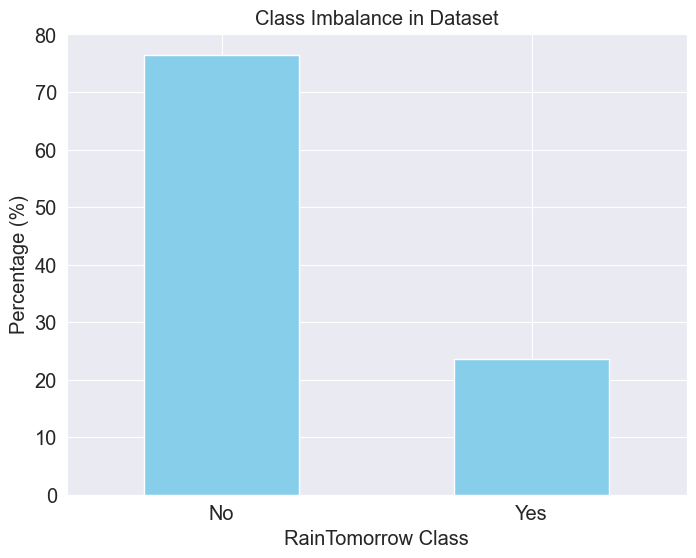

In [853]:
import matplotlib.pyplot as plt

# Calculate the count of each class
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Calculate the percentage of each class
class_imbalance_percentage = (class_counts / len(weatherAUS_df)) * 100

# Plot the histogram
plt.figure(figsize=(8, 6))
class_imbalance_percentage.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance in Dataset')
plt.xlabel('RainTomorrow Class')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [854]:
import pandas as pd

# Assuming weatherAUS_df is your DataFrame containing the data
# Assuming RainTomorrow is the target variable

# Step 1: Measure the count of each class of RainTomorrow
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Step 2: Determine the minority class
minority_class = class_counts.idxmin()

# Step 3: Sample an equal number of data points from each class
balanced_data = pd.concat([
    weatherAUS_df[weatherAUS_df['RainTomorrow'] == minority_class],
    weatherAUS_df[weatherAUS_df['RainTomorrow'] != minority_class].sample(n=class_counts[minority_class], random_state=78)
])

# Display the class counts in the balanced dataset
print(balanced_data['RainTomorrow'].value_counts())
weatherAUS_df = balanced_data

RainTomorrow
Yes    8529
No     8529
Name: count, dtype: int64


In [855]:
import pandas as pd


# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 9039


In [856]:
from sklearn.impute import SimpleImputer
weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
numeric_cols = weatherAUS_df_numeric.columns.tolist()
imputer = SimpleImputer(strategy = "mean").fit(weatherAUS_df[numeric_cols])
weatherAUS_df[numeric_cols] = imputer.transform(weatherAUS_df[numeric_cols])

In [857]:

categorical_columns = weatherAUS_df.select_dtypes(exclude=['number'])
for column in categorical_columns.columns.tolist():
    weatherAUS_df[column] = weatherAUS_df[column].fillna(weatherAUS_df[column].mode()[0])
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)
print(weatherAUS_df.head())

Number of rows with at least one NaN value: 0
          Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5    9/28/2011     Mildura     15.7     27.3       0.0    11.200000  5.600000   
11    3/3/2009   Nuriootpa     16.4     28.0       1.0     5.000000  1.700000   
15  11/22/2009  Launceston     10.7     18.0       6.0     4.918865  6.396593   
21   11/5/2010   NorahHead     13.8     19.2      18.6     4.918865  6.396593   
23  10/31/2010  Launceston     14.4     21.1       4.4     4.918865  6.396593   

   WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
5            N           65.0        ENE  ...        86.0       1002.0   
11         WSW           65.0        WNW  ...        96.0       1003.9   
15           W           33.0        SSE  ...        87.0       1001.5   
21         SSE           61.0         SE  ...        83.0       1022.7   
23           N           57.0        ENE  ...        67.0       1005.0   

    Pressure3pm  Cloud

In [858]:

weatherAUS_df = weatherAUS_df.drop(columns=['Date'])
numeric_cols = weatherAUS_df.select_dtypes(include = np.number).columns.to_list()

print(weatherAUS_df.shape[0])

17058


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


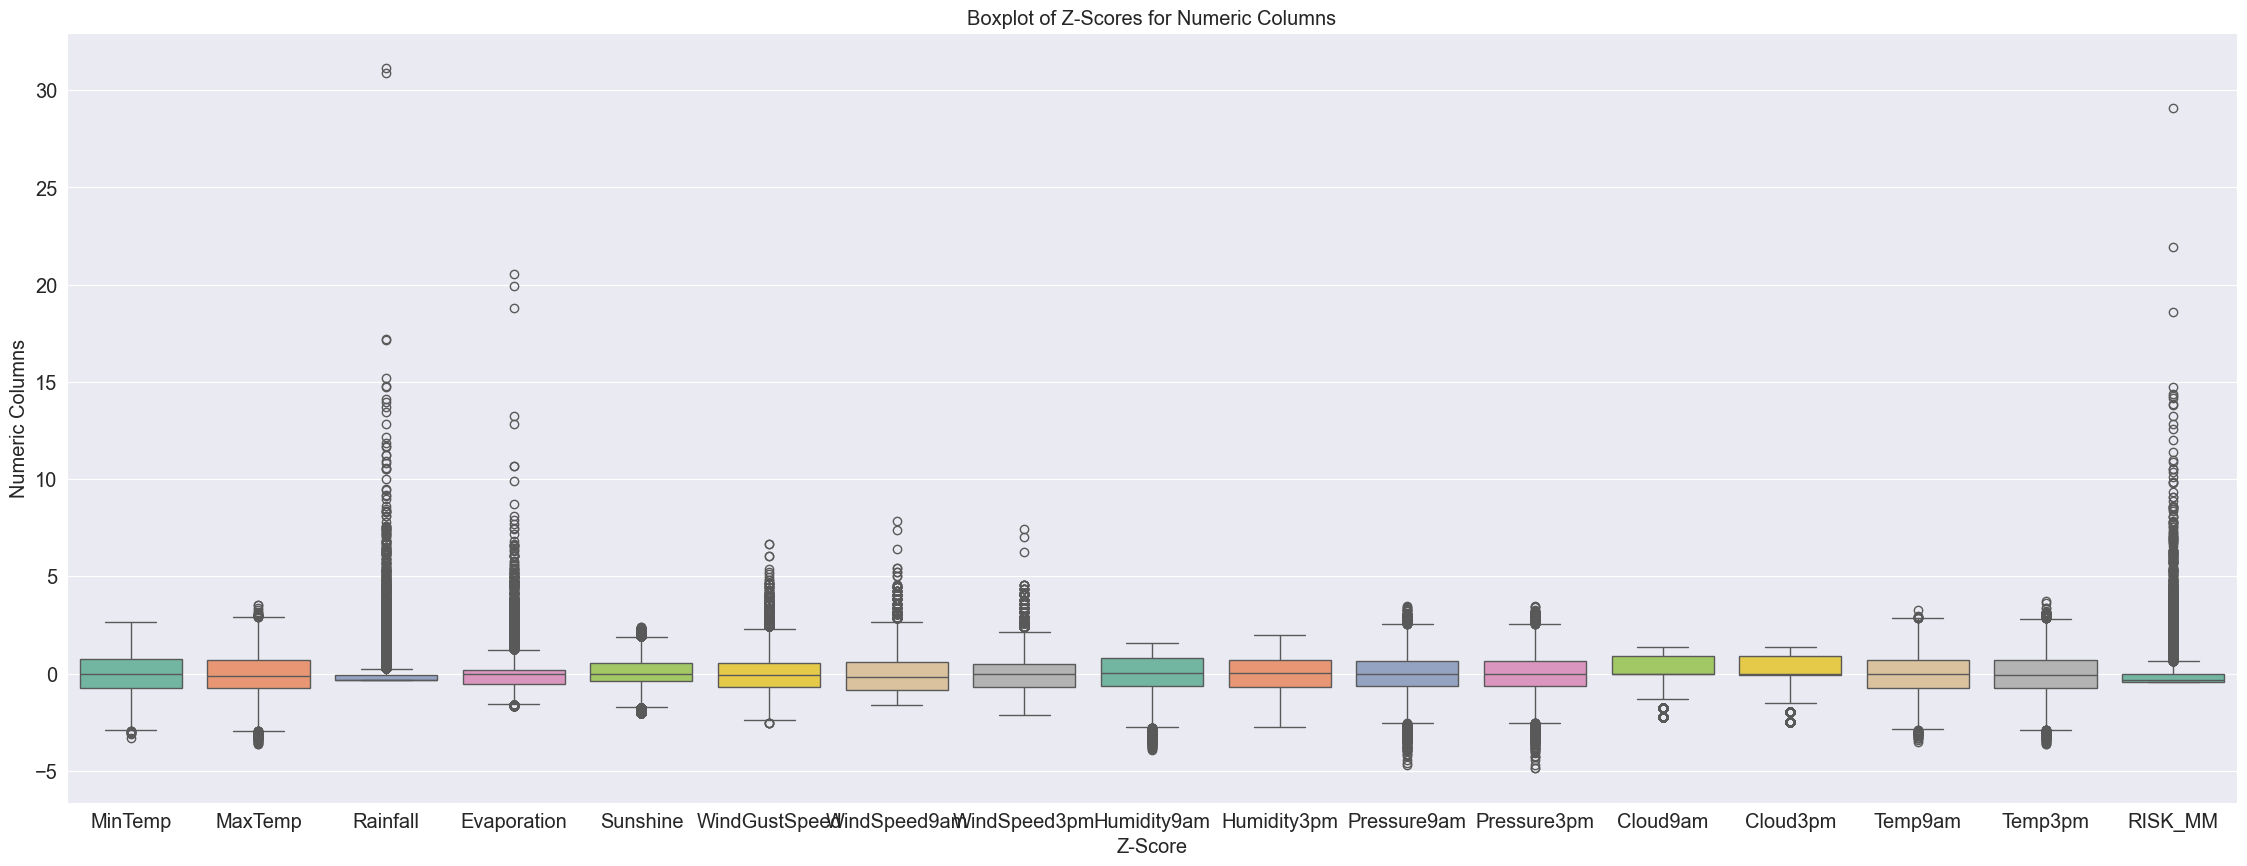

Total data row count => 17058
Oultlier row count => 1363


In [859]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate z-scores for each numeric column
weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
print(weatherAUS_df_numeric.columns.tolist())
z_scores = stats.zscore(weatherAUS_df_numeric)

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=weatherAUS_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 10))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
print("Total data row count =>",weatherAUS_df.shape[0])
outlier_rows = weatherAUS_df[(abs_z_scores > threshold).any(axis=1)]
print("Oultlier row count =>",outlier_rows.shape[0])


In [860]:
# We only take the data with no outliers
weatherAUS_df = weatherAUS_df[(abs_z_scores < threshold).all(axis=1)]
print(weatherAUS_df.shape[0])


15695


In [861]:
# Label Encoding the Target Variable
weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0}) 
weatherAUS_df['RainTomorrow'] = weatherAUS_df['RainTomorrow'].astype(int)


# Perform one-hot encoding on all categorical columns
weatherAUS_final_df = pd.get_dummies(weatherAUS_df)
weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_17996/2853105599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0})
/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_17996/2853105599.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


In [862]:
print(weatherAUS_final_df.head())
print(weatherAUS_final_df.columns.tolist())

    MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
5      15.7     27.3       0.0    11.200000  5.600000           65.0   
11     16.4     28.0       1.0     5.000000  1.700000           65.0   
15     10.7     18.0       6.0     4.918865  6.396593           33.0   
21     13.8     19.2      18.6     4.918865  6.396593           61.0   
23     14.4     21.1       4.4     4.918865  6.396593           57.0   

    WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
5           11.0          13.0         60.0         86.0  ...             0   
11          15.0          37.0         39.0         96.0  ...             0   
15           6.0          15.0         93.0         87.0  ...             0   
21          31.0          22.0         75.0         83.0  ...             1   
23          13.0          37.0         74.0         67.0  ...             0   

    WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
5               0       

In [863]:
print(weatherAUS_final_df.isna().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_No      0
RainToday_Yes     0
Length: 114, dtype: int64


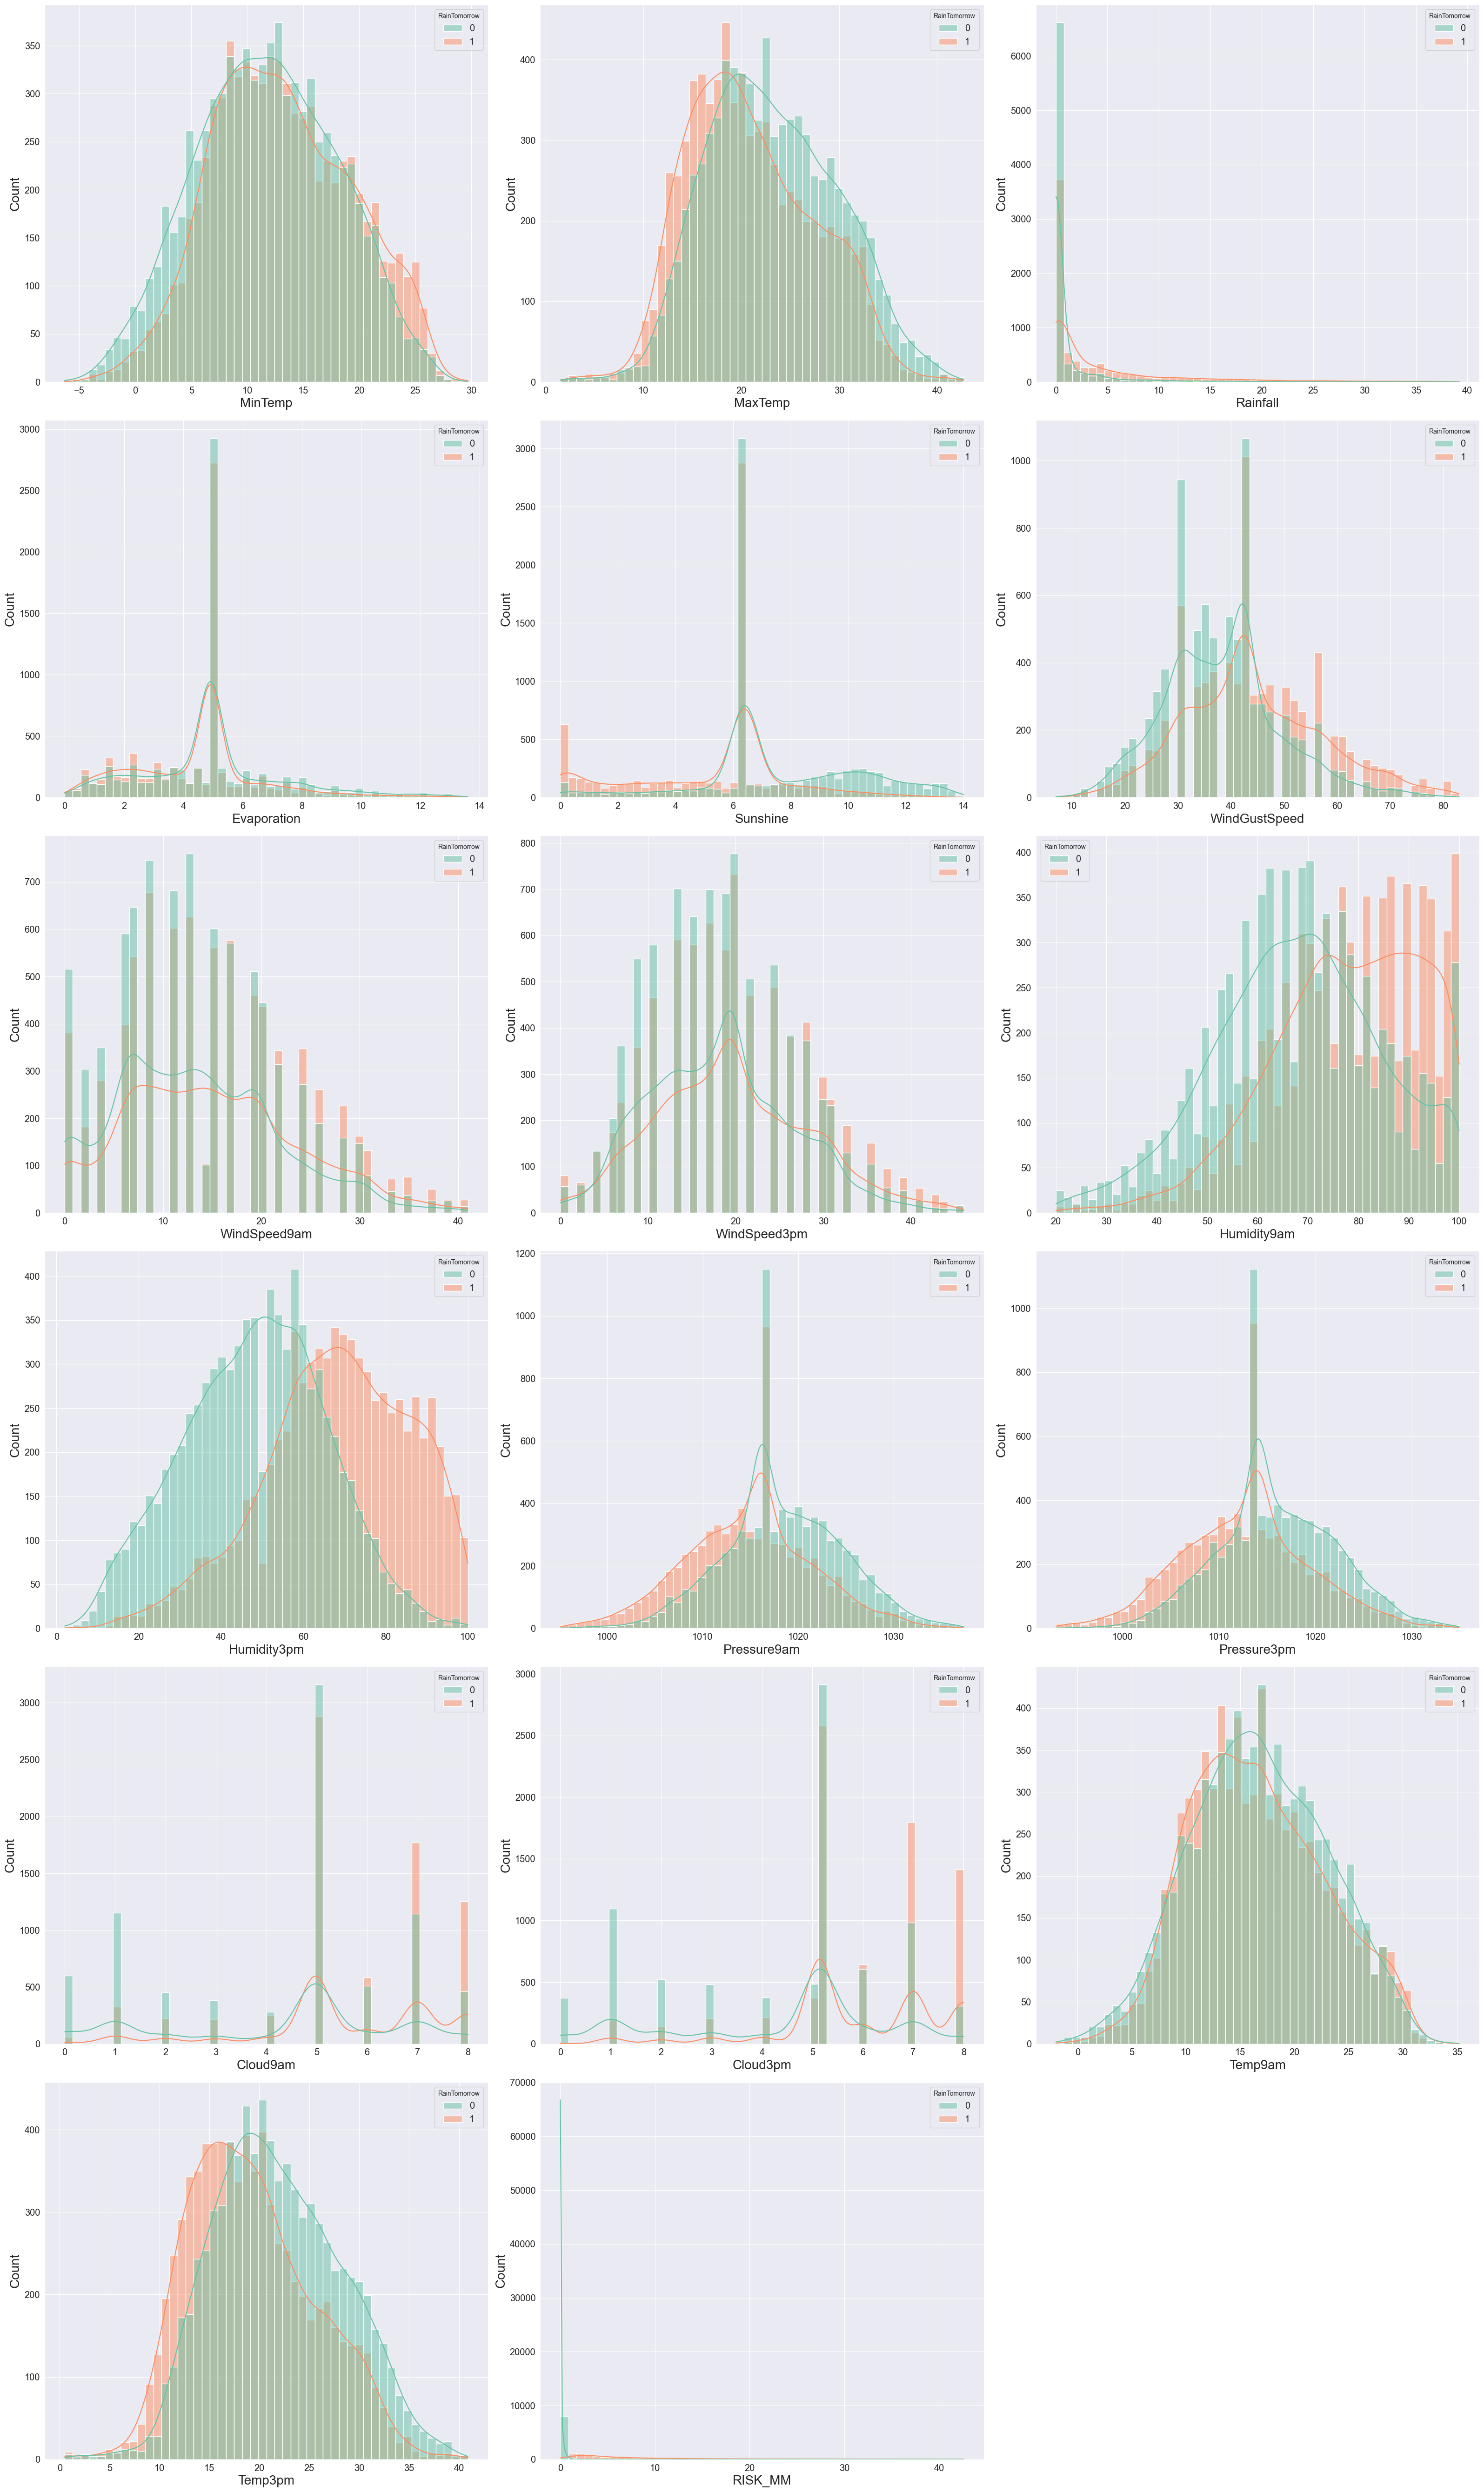

In [864]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

weatherAUS_df_numerics = weatherAUS_df.select_dtypes(include=['number'])
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(weatherAUS_df_numerics, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

In [865]:
from pandas.plotting import scatter_matrix
attributes = weatherAUS_df_numerics.columns.tolist()
colors = ['#290132' if c == 0 else '#B8860B' for c in weatherAUS_df_numerics['RainTomorrow']]

# Create scatter matrix plot
scatter_matrix(weatherAUS_df_numerics[attributes], figsize=(32, 72), c=colors, marker='o', hist_kwds={'bins': 20}, alpha=0.5)
plt.show()


KeyboardInterrupt: 

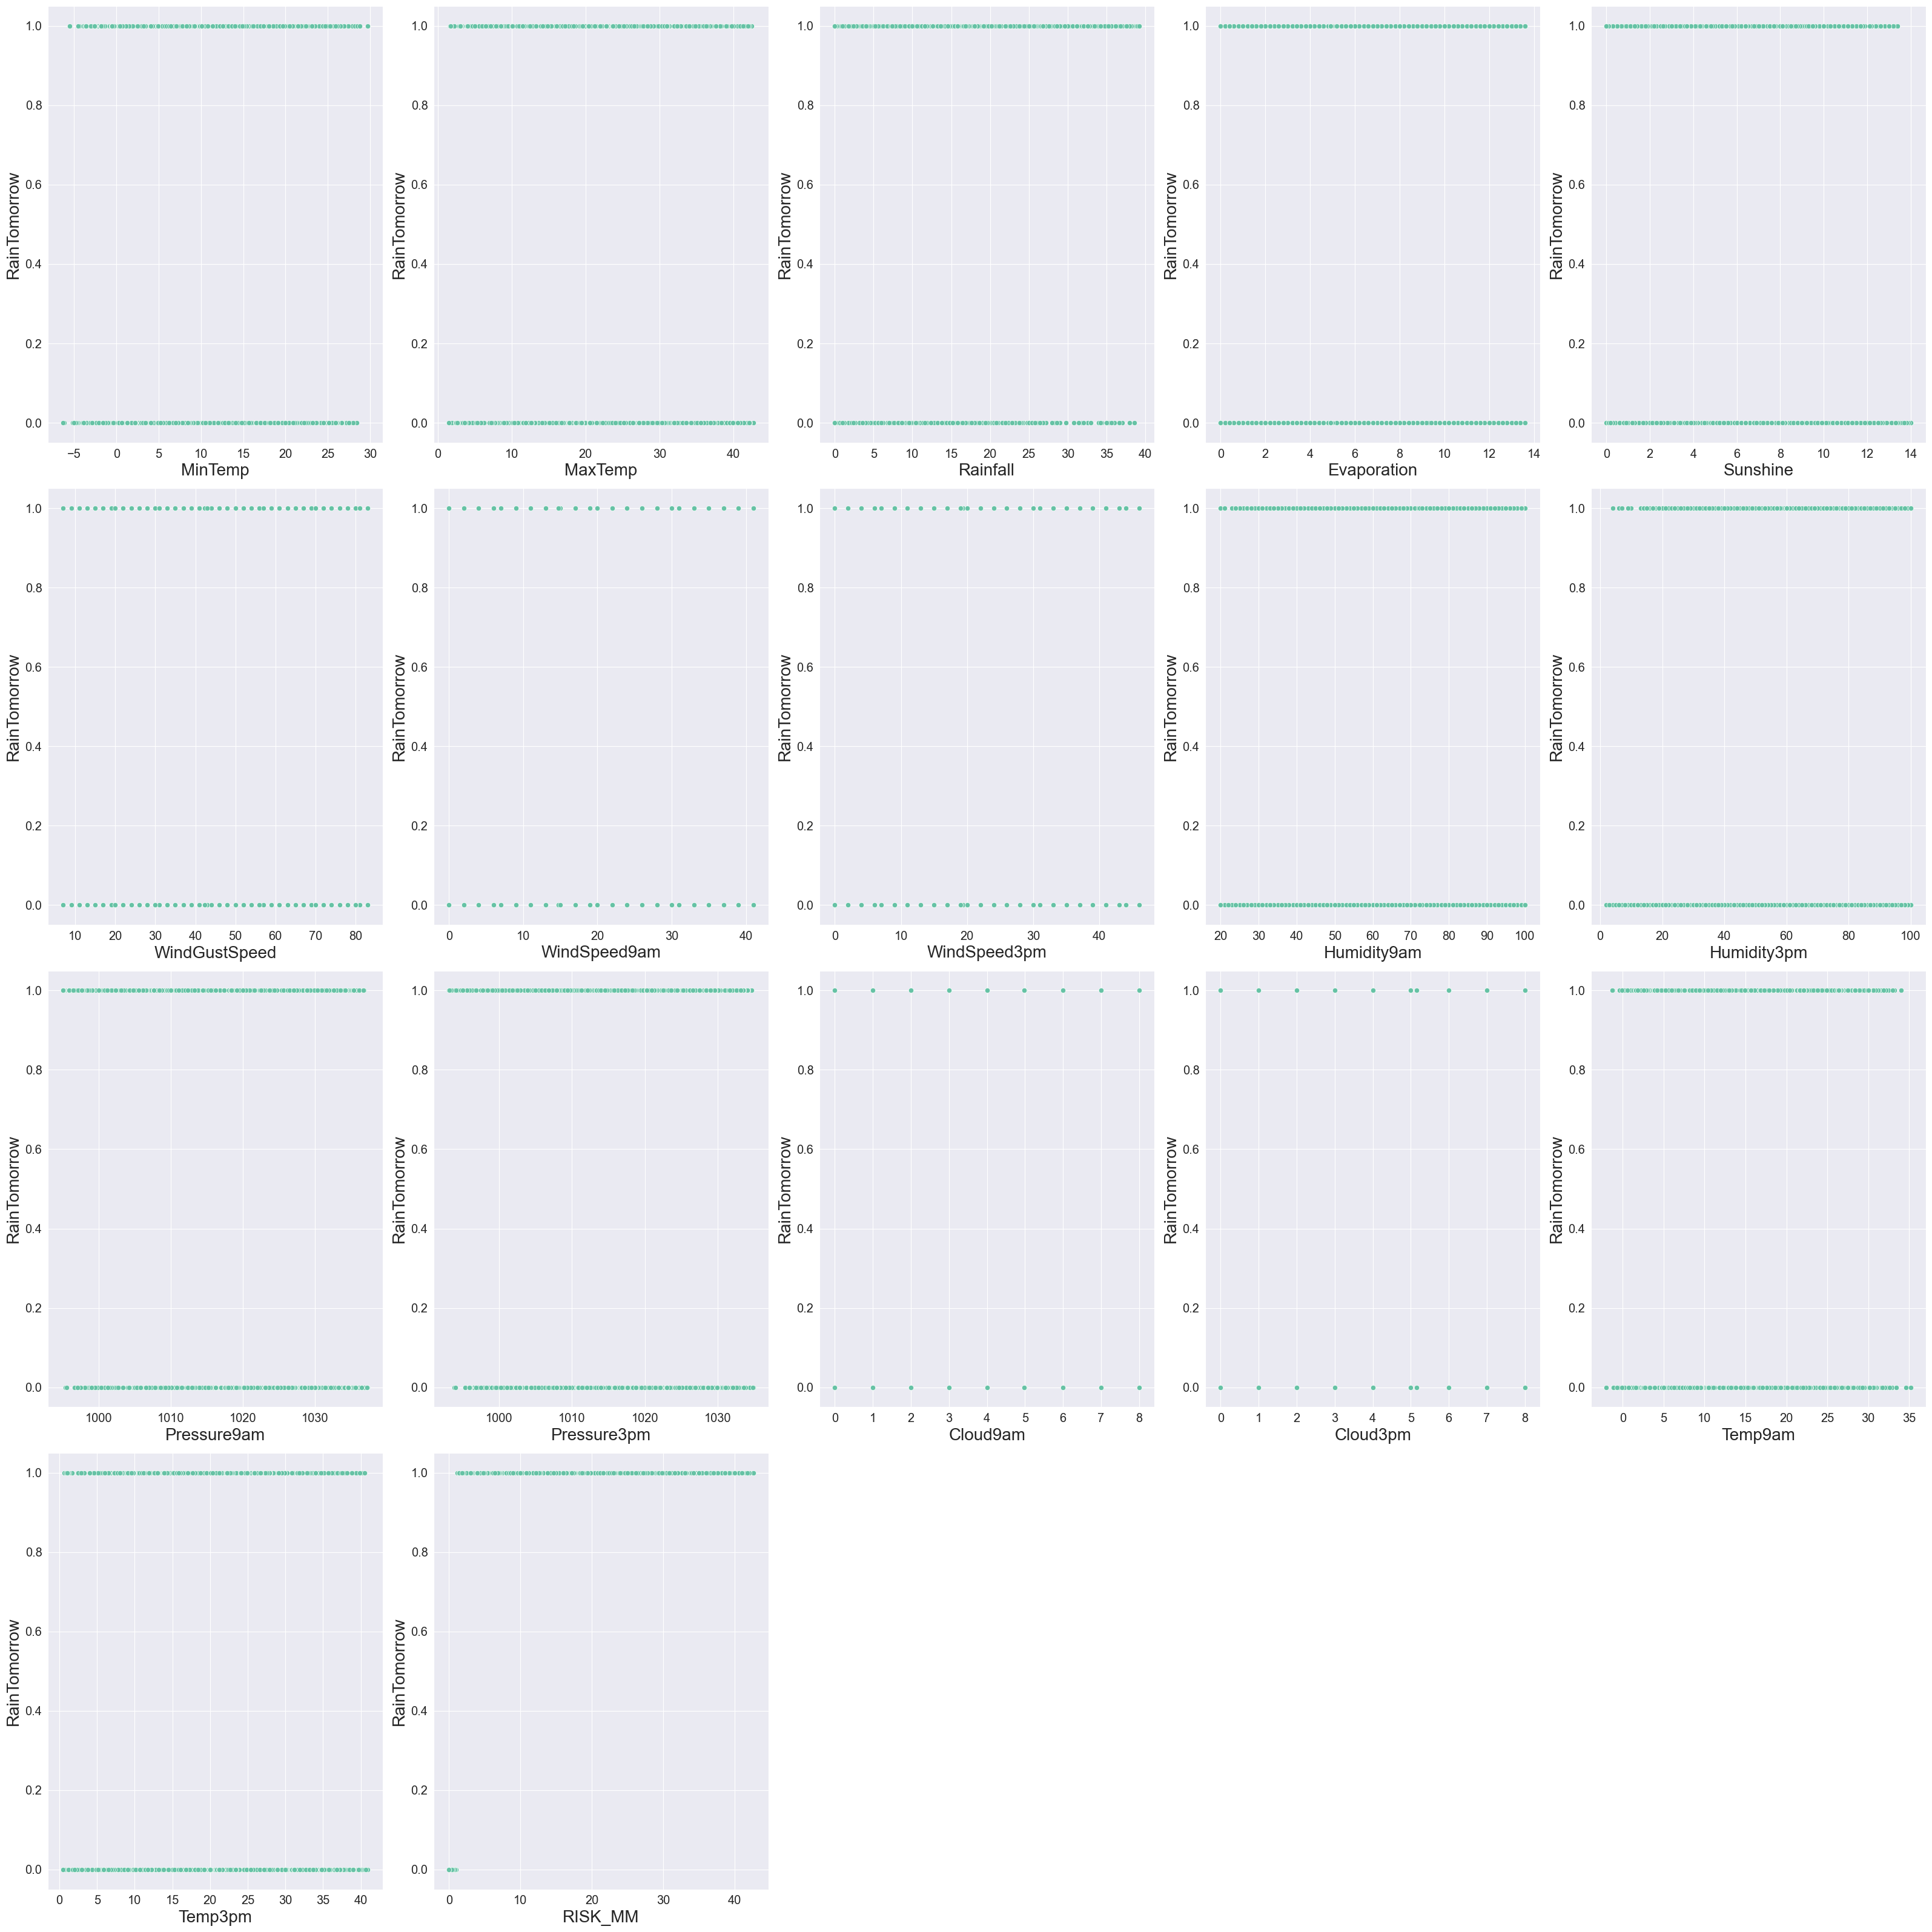

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=weatherAUS_df_numerics, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()


MinTemp          0.109223
MaxTemp         -0.163294
Rainfall         0.267119
Evaporation     -0.108320
Sunshine        -0.395702
WindGustSpeed    0.235006
WindSpeed9am     0.097814
WindSpeed3pm     0.077351
Humidity9am      0.293434
Humidity3pm      0.493386
Pressure9am     -0.264621
Pressure3pm     -0.247263
Cloud9am         0.308495
Cloud3pm         0.379028
Temp9am         -0.008435
Temp3pm         -0.204577
RISK_MM          0.581780
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64


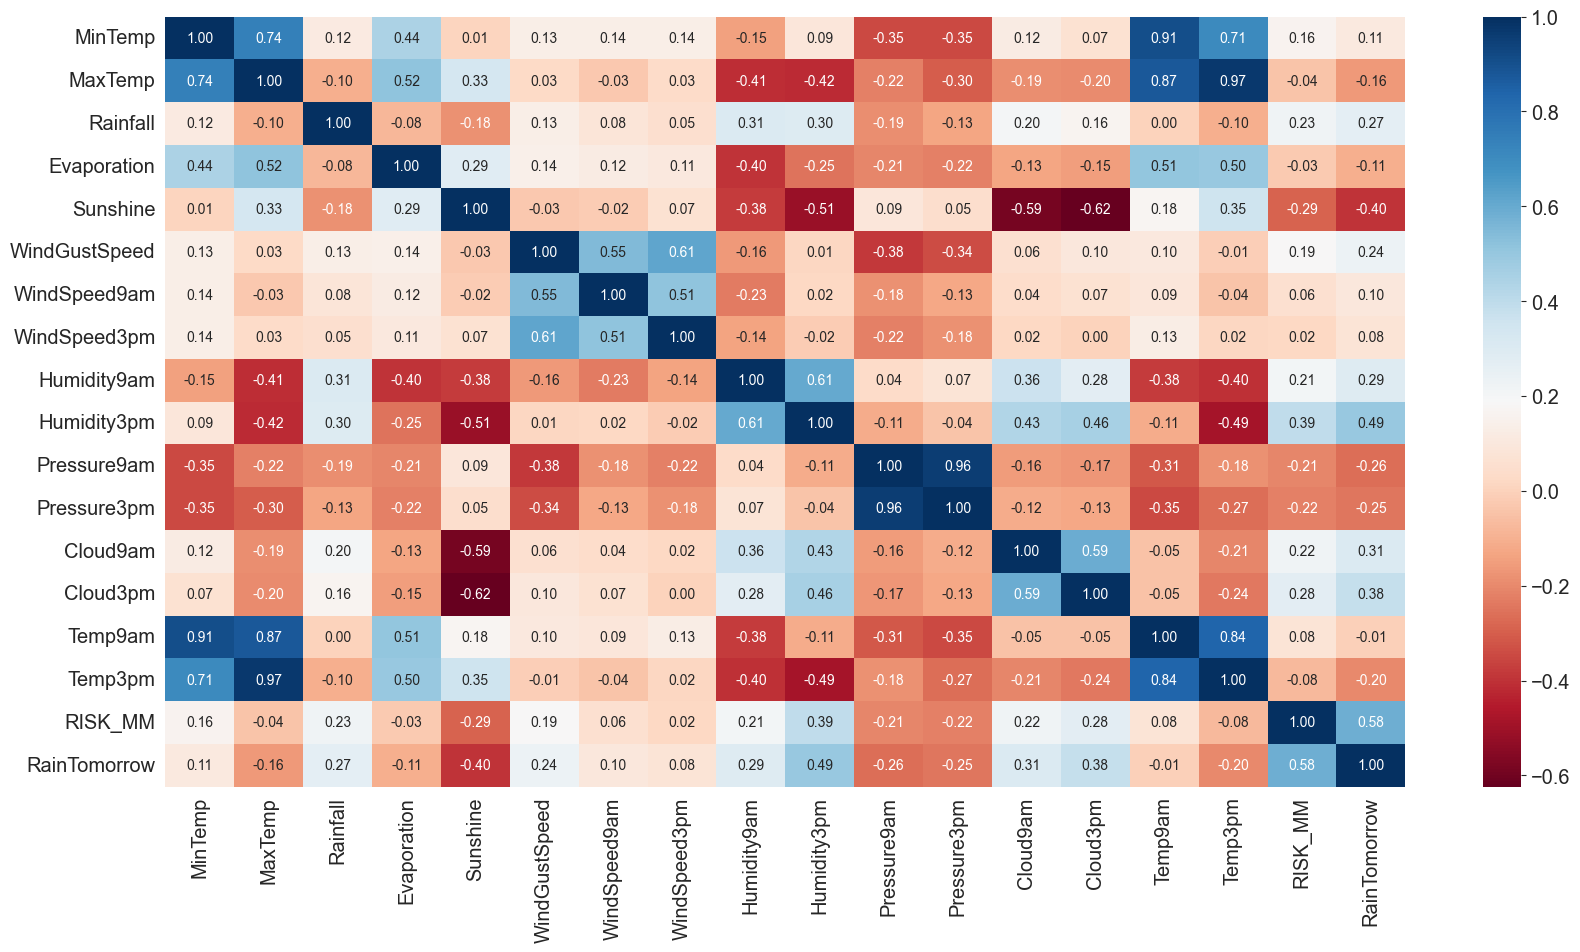

In [ ]:
weatherAUS_df_corr_matrix = weatherAUS_df.corr(numeric_only=True)
print(weatherAUS_df_corr_matrix['RainTomorrow'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(weatherAUS_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f");

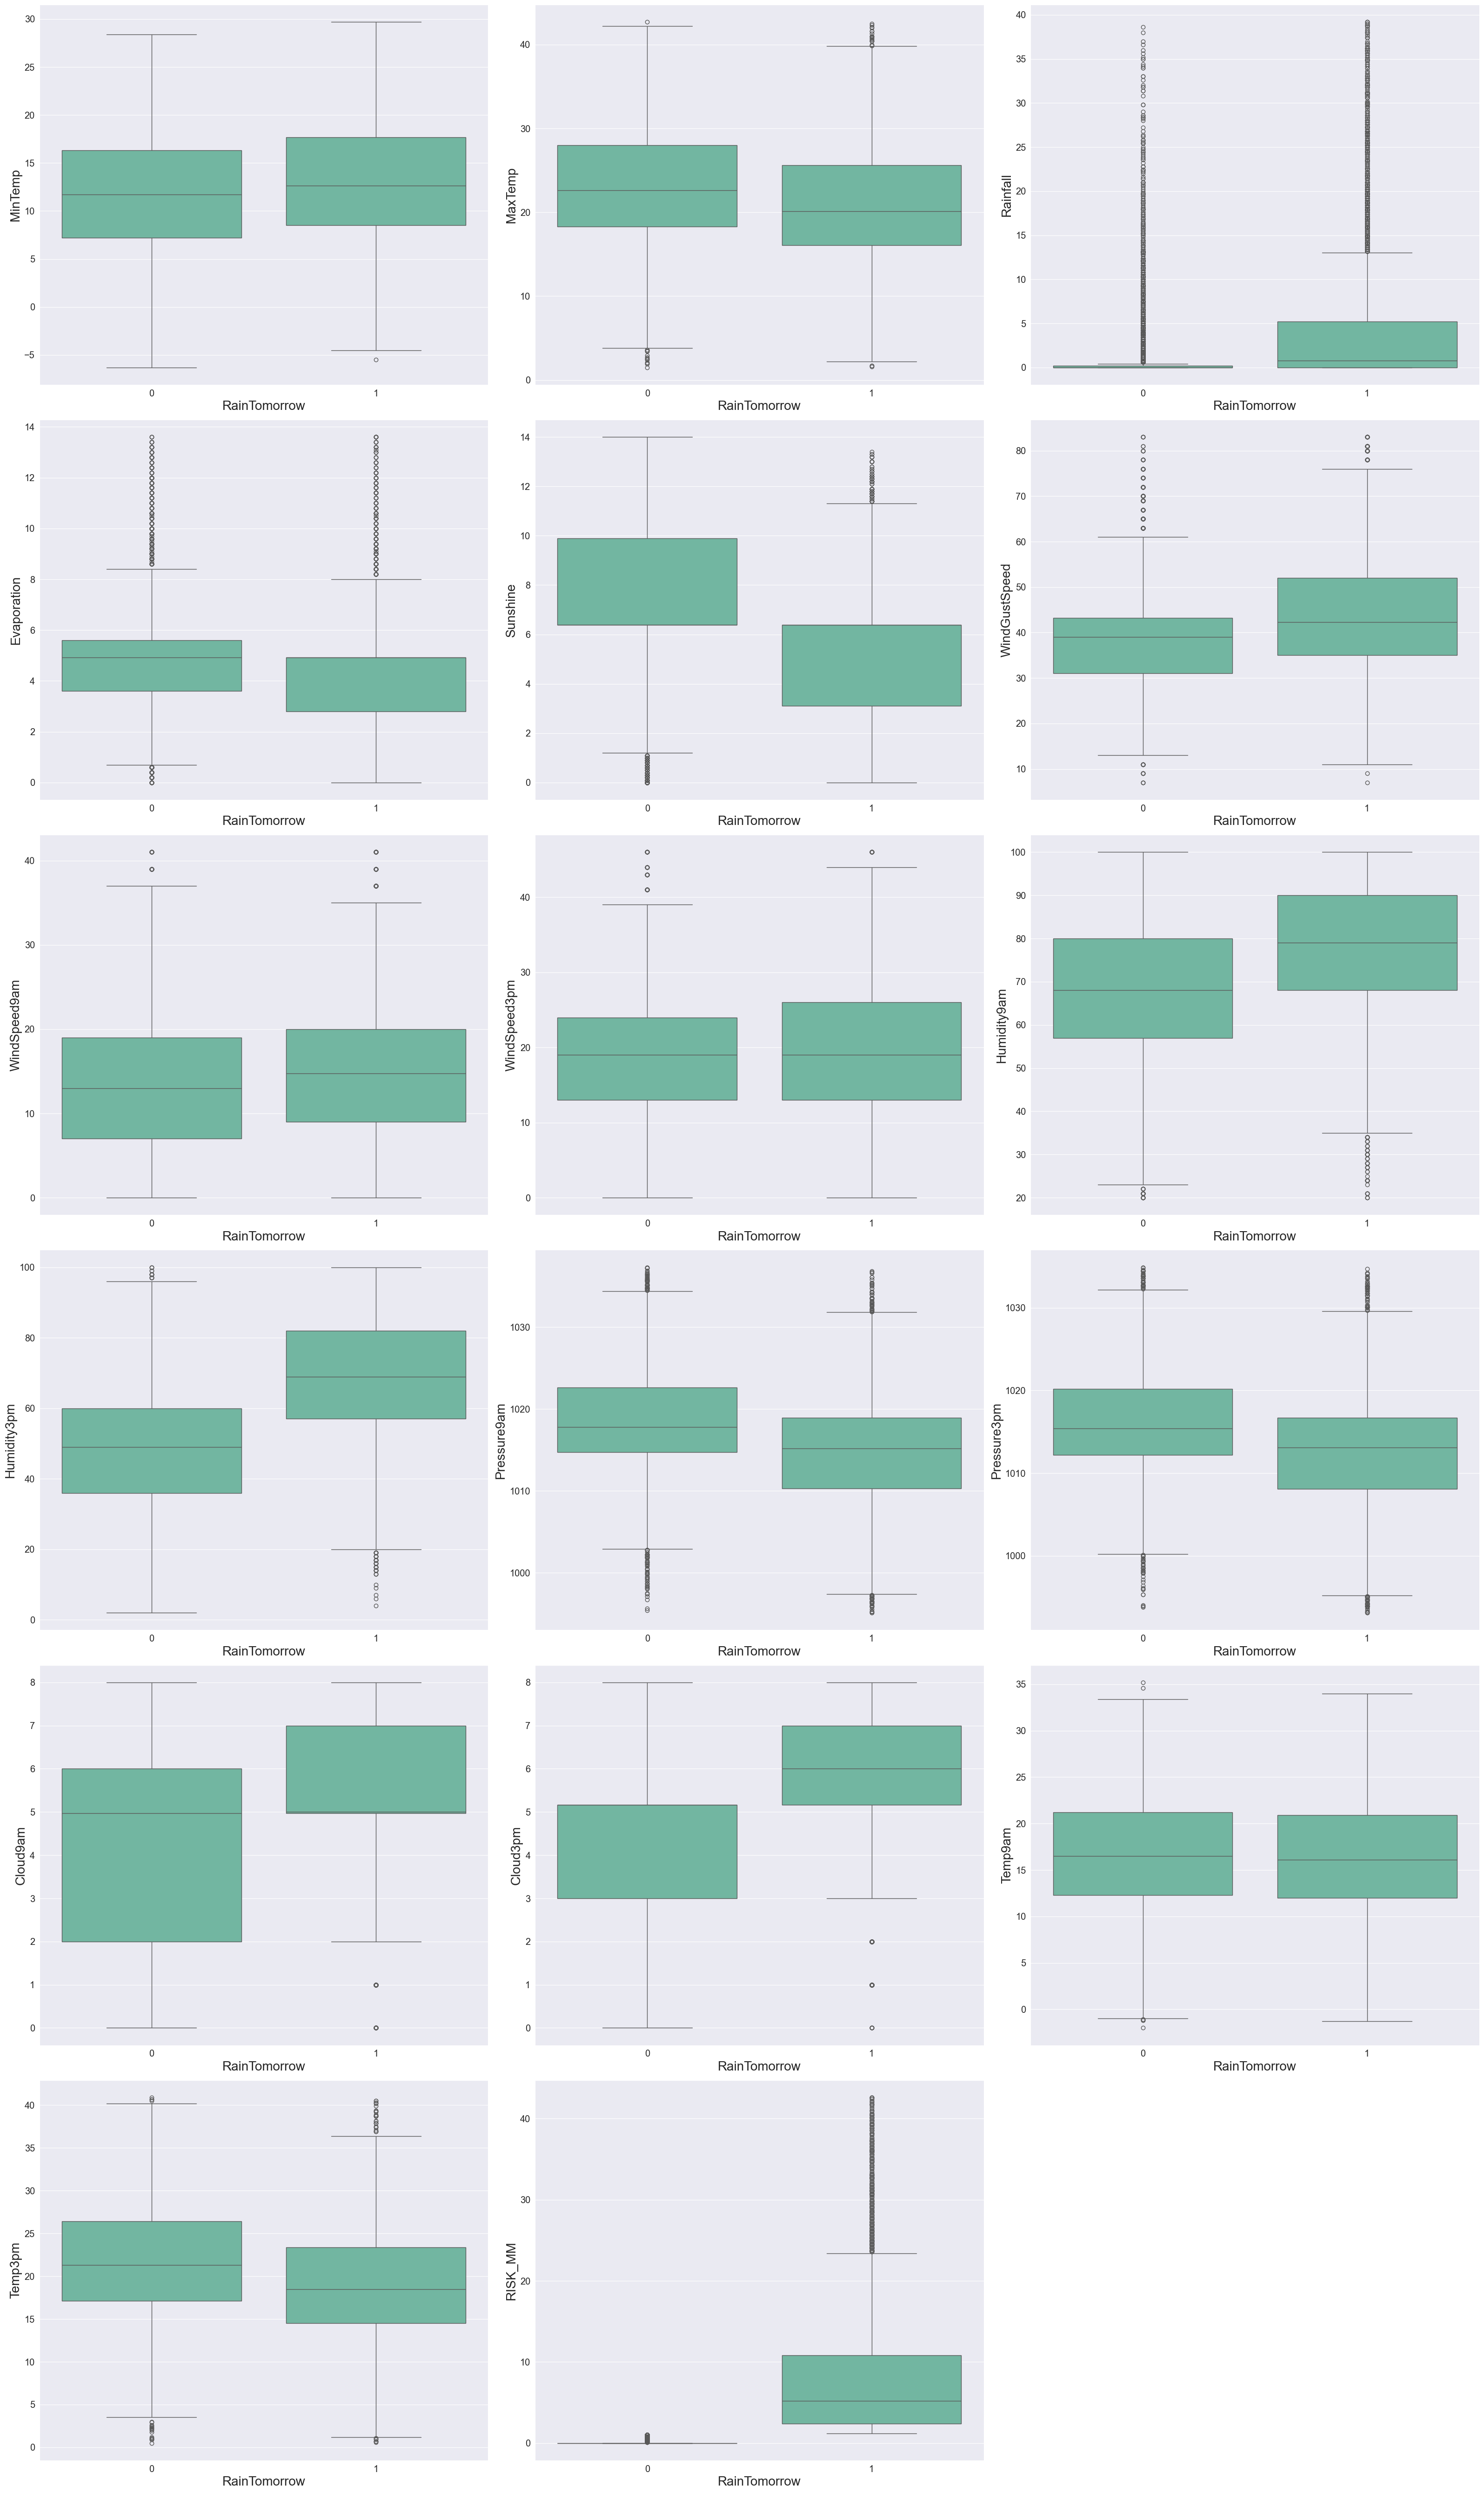

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=weatherAUS_df_numerics, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# Getting independent and dependent variables
y = weatherAUS_final_df.RainTomorrow.values
X = weatherAUS_final_df.drop(['RainTomorrow'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid including 'presort'
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add 'presort' parameter
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data with tqdm progress bar
with tqdm(total=len(param_grid) * 5) as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update()

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Print the best score found
print("Best accuracy score on validation data:", grid_search.best_score_)

# Evaluate the best model on test data
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test)
print("Accuracy on test data:", test_accuracy)


  5%|▌         | 1/20 [00:06<02:02,  6.46s/it]

Best parameters found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score on validation data: 1.0
Accuracy on test data: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split= 2)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'RISK_MM <= 1.1\ngini = 0.499\nsamples = 12556\nvalue = [6501, 6055]\nclass = RainTomorrow No'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6501\nvalue = [6501, 0]\nclass = RainTomorrow No'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6055\nvalue = [0, 6055]\nclass = RainTomorrow Yes')]

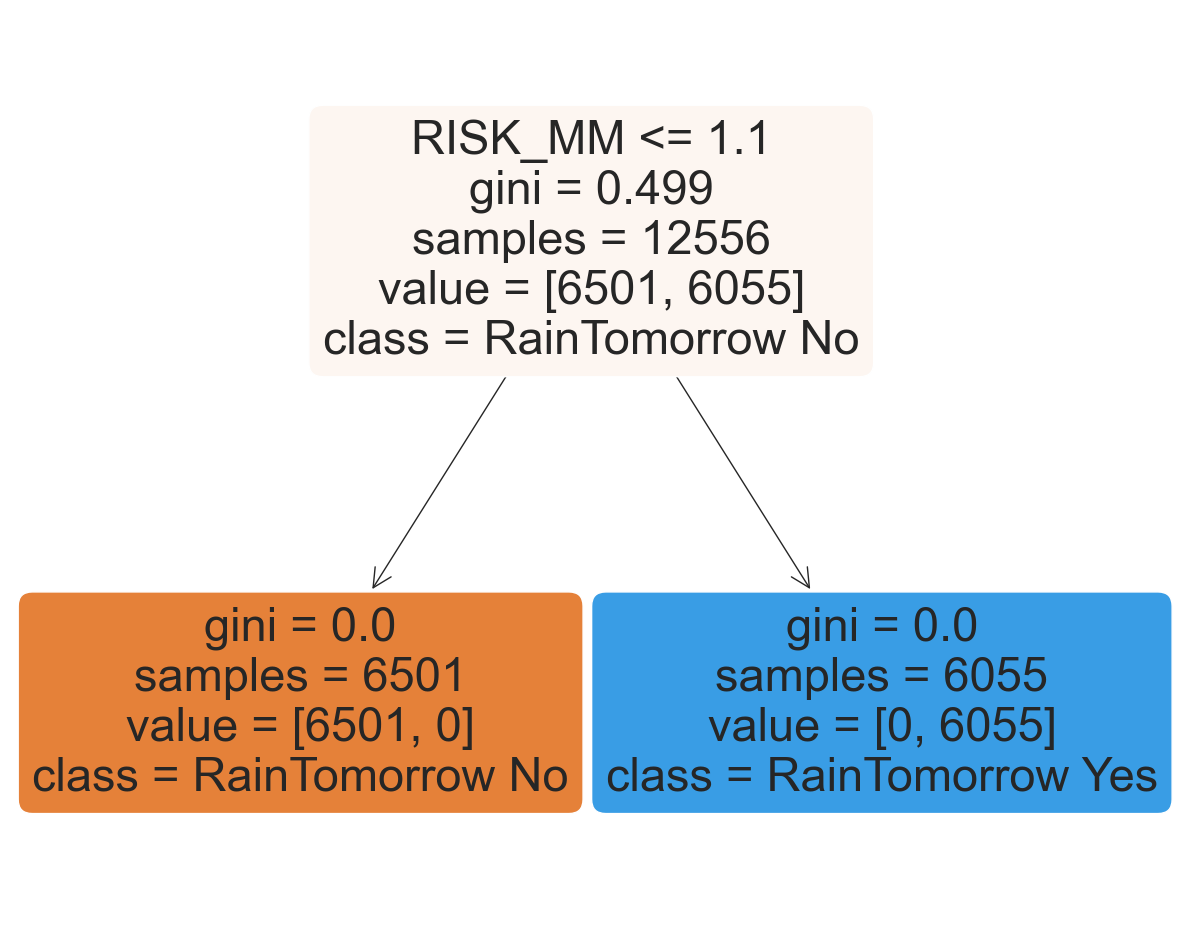

In [ ]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["RainTomorrow No", "RainTomorrow Yes"], 
          feature_names=X.columns)

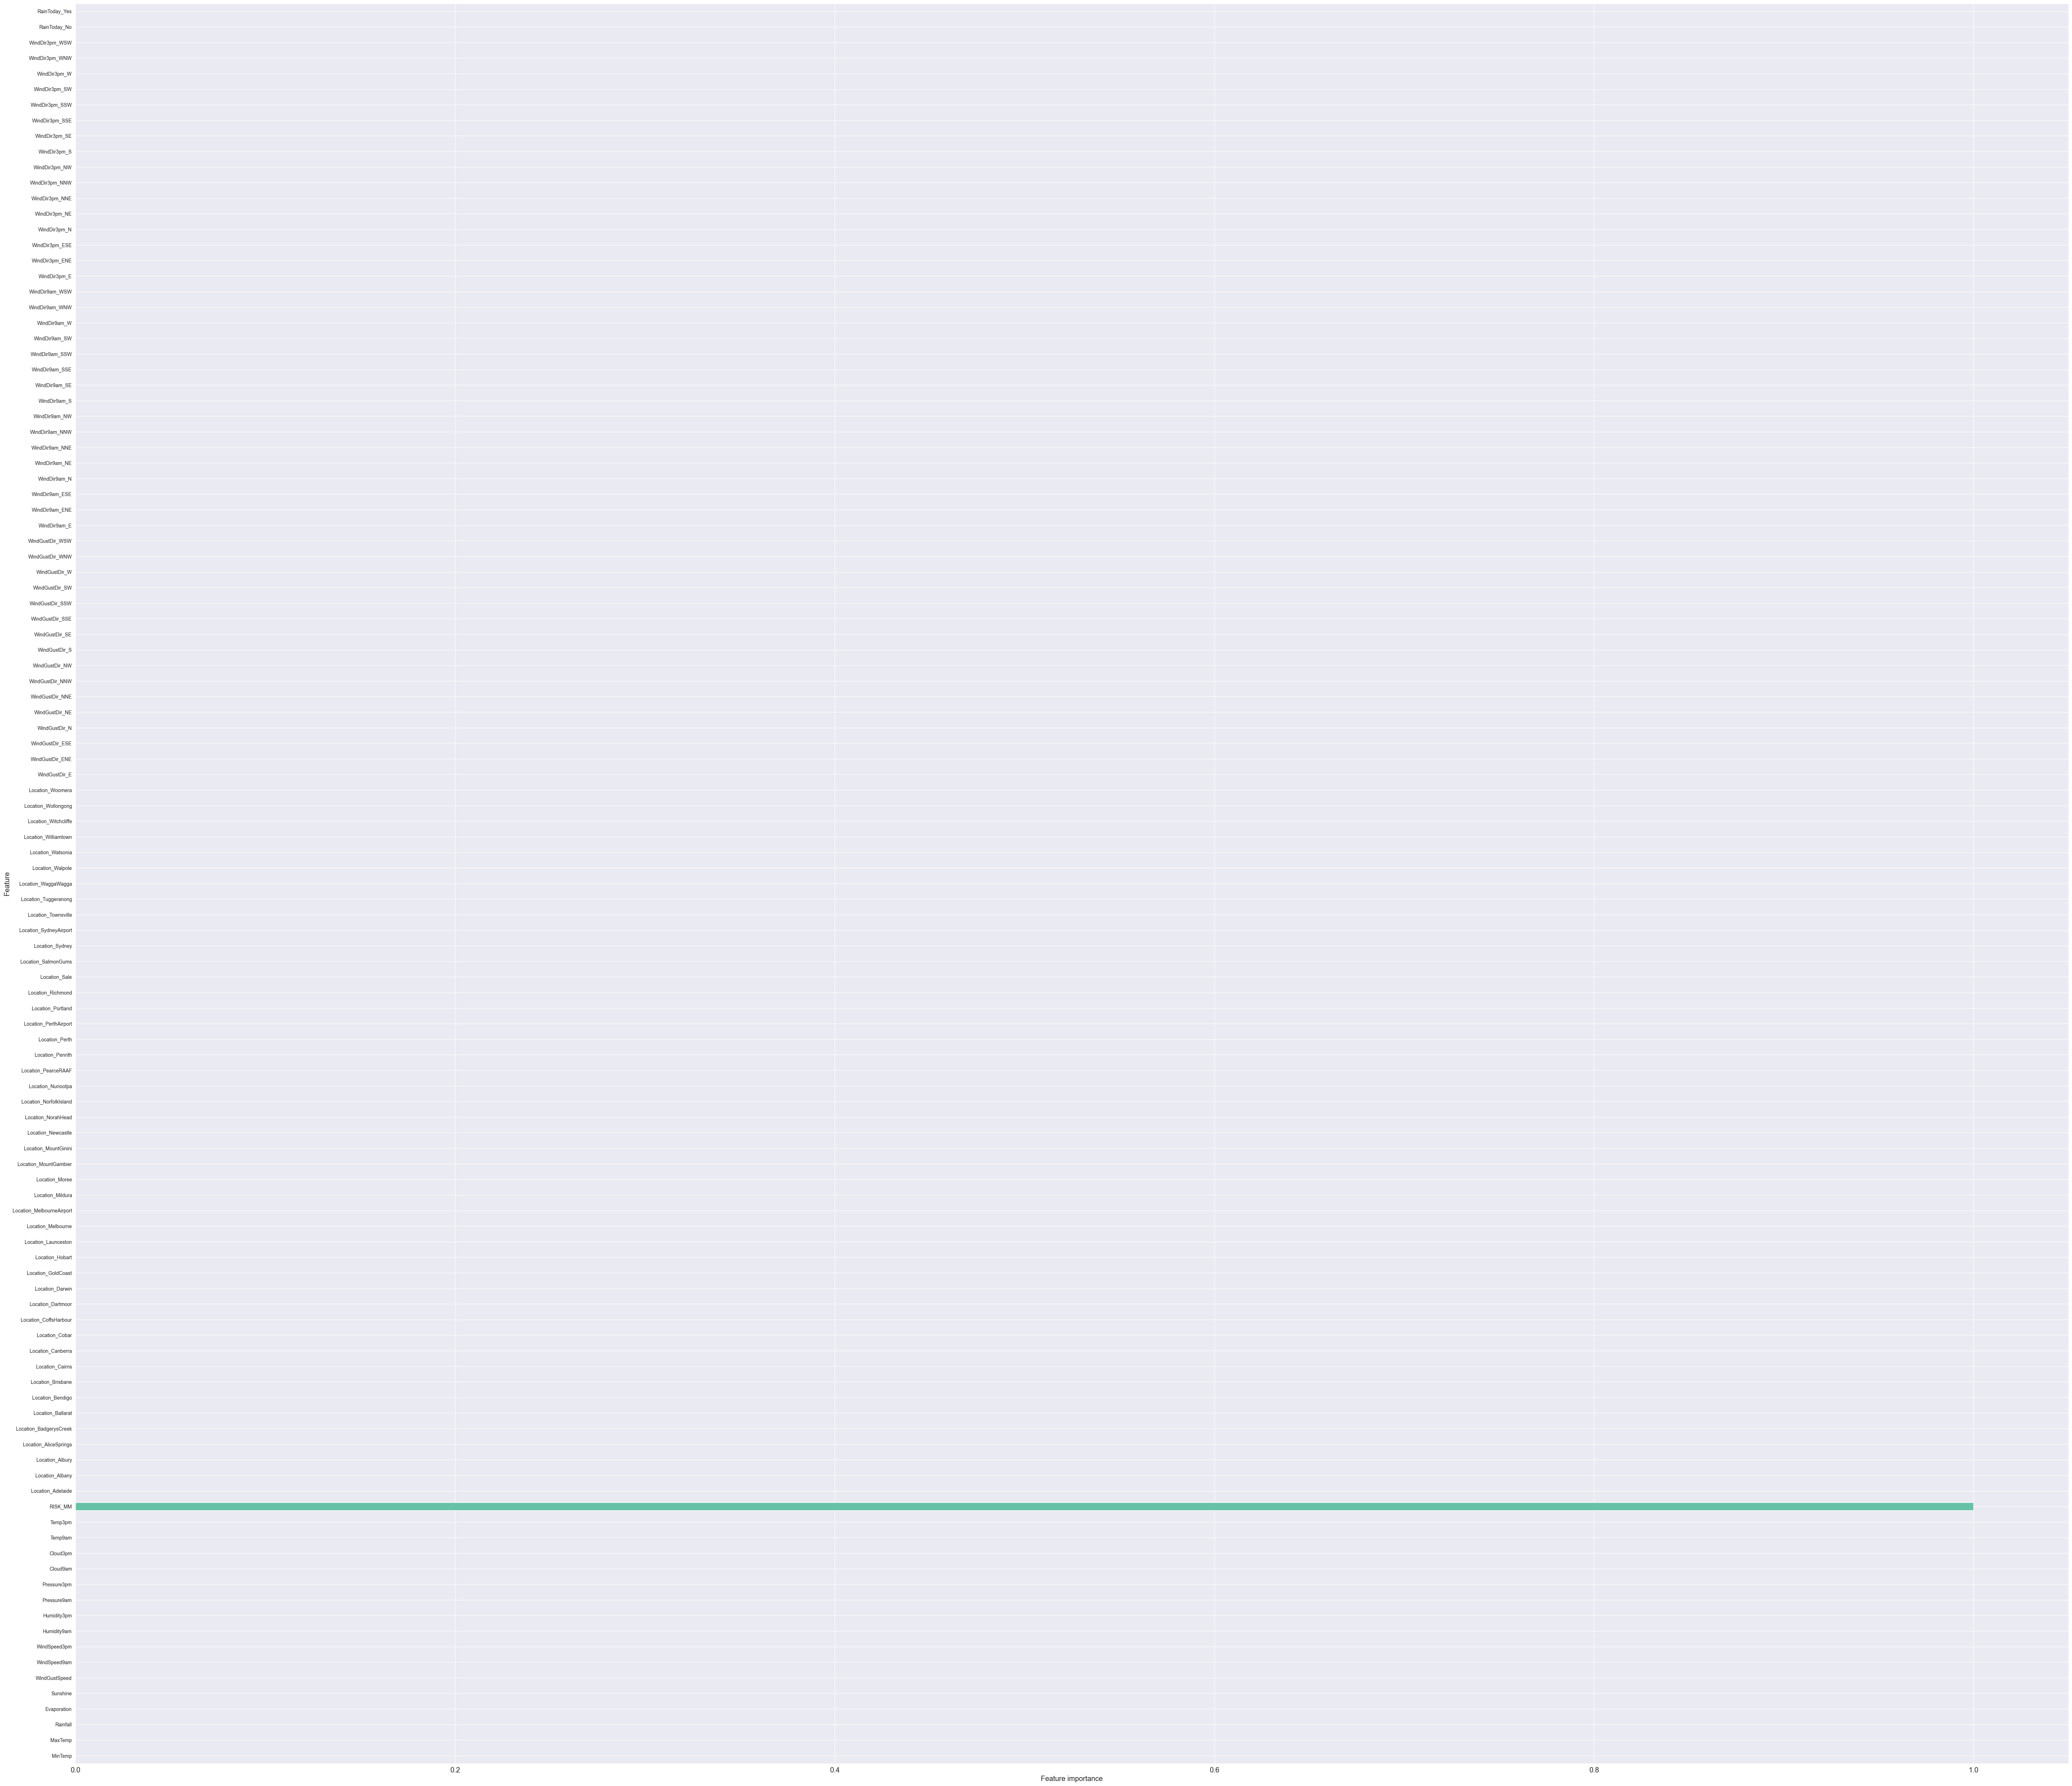

In [ ]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(72, 64))  # Increase the figure size
    bar_width = 0.5  # Adjust the width of the bars
    plt.barh(np.arange(n_features), model.feature_importances_, height=bar_width, align='center')  # Adjust the height
    plt.yticks(np.arange(n_features), X.columns, fontsize=10)  # Adjust fontsize
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features - 0.5)  # Adjust ylim for better spacing

plot_feature_importances_(clf_dt)


In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

In [ ]:
X = weatherAUS_final_df.drop(['RISK_MM','RainTomorrow'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6995858553679516

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
# Export the decision tree to a DOT file
dot_data = export_graphviz(clf_dt, out_file=None, 
                           feature_names=X.columns,  # Assuming X is a DataFrame with column names
                           class_names=['No Rain', 'Rain'],  # Assuming binary classification
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render("weather_decision_tree.pdf", cleanup=True)

'weather_decision_tree.pdf.pdf'

[Text(0.5972411893835777, 0.9848484848484849, 'Humidity3pm <= 60.5\ngini = 0.499\nsamples = 12556\nvalue = [6501, 6055]\nclass = RainTomorrow No'),
 Text(0.3569683804743305, 0.9545454545454546, 'Sunshine <= 9.35\ngini = 0.406\nsamples = 6831\nvalue = [4894, 1937]\nclass = RainTomorrow No'),
 Text(0.21706466615613046, 0.9242424242424242, 'Pressure3pm <= 1013.65\ngini = 0.458\nsamples = 4768\nvalue = [3072, 1696]\nclass = RainTomorrow No'),
 Text(0.09403450132427299, 0.8939393939393939, 'Humidity3pm <= 48.5\ngini = 0.499\nsamples = 1787\nvalue = [859.0, 928.0]\nclass = RainTomorrow Yes'),
 Text(0.04573774713074186, 0.8636363636363636, 'Sunshine <= 5.85\ngini = 0.484\nsamples = 967\nvalue = [569, 398]\nclass = RainTomorrow No'),
 Text(0.01671526793119131, 0.8333333333333334, 'Location_Cobar <= 0.5\ngini = 0.428\nsamples = 200\nvalue = [62, 138]\nclass = RainTomorrow Yes'),
 Text(0.015003076593809358, 0.803030303030303, 'Humidity3pm <= 15.5\ngini = 0.415\nsamples = 194\nvalue = [57, 137]\n

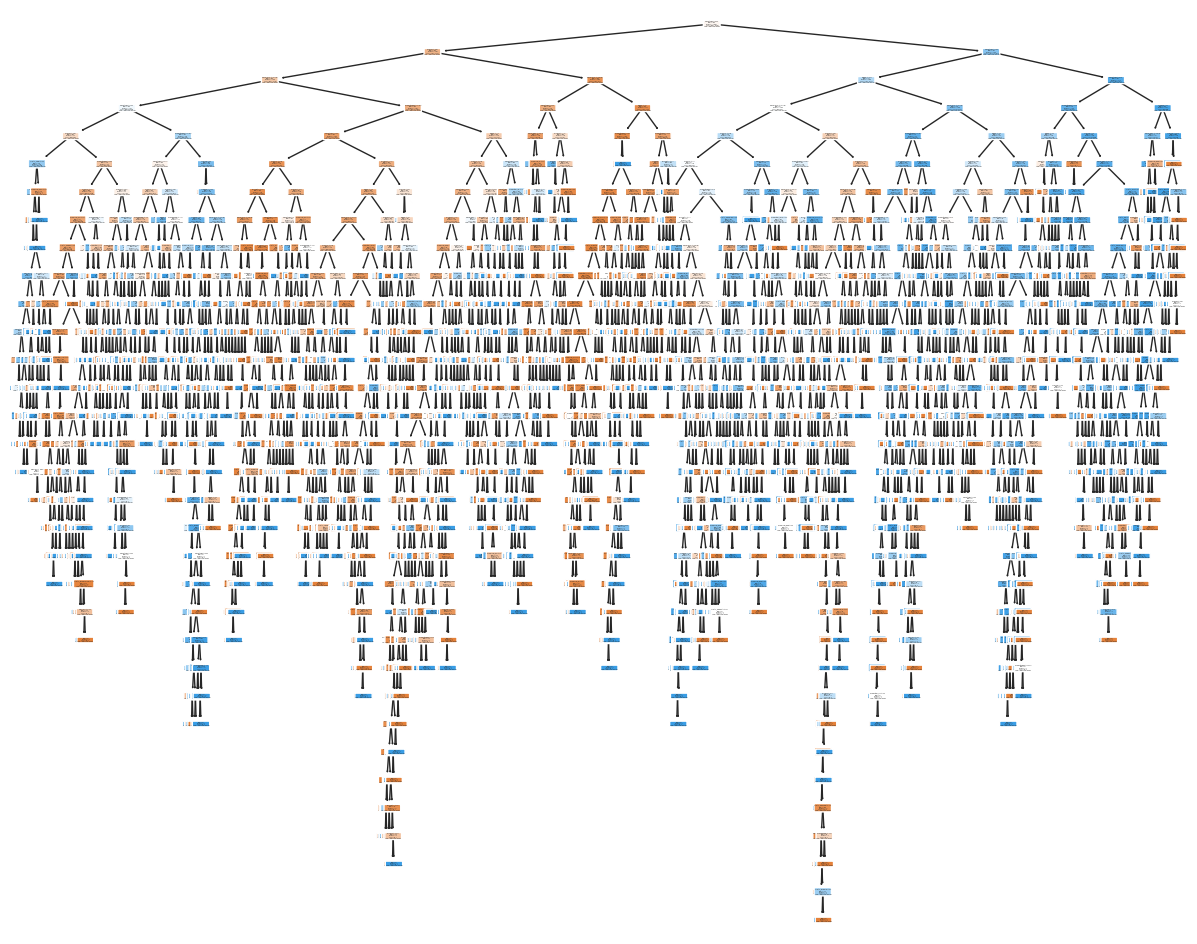

In [ ]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True,
          class_names=["RainTomorrow No", "RainTomorrow Yes"], 
          feature_names=X.columns)

In [ ]:
print("Depth of the decision tree", clf_dt.tree_.max_depth)

Depth of the decision tree 32


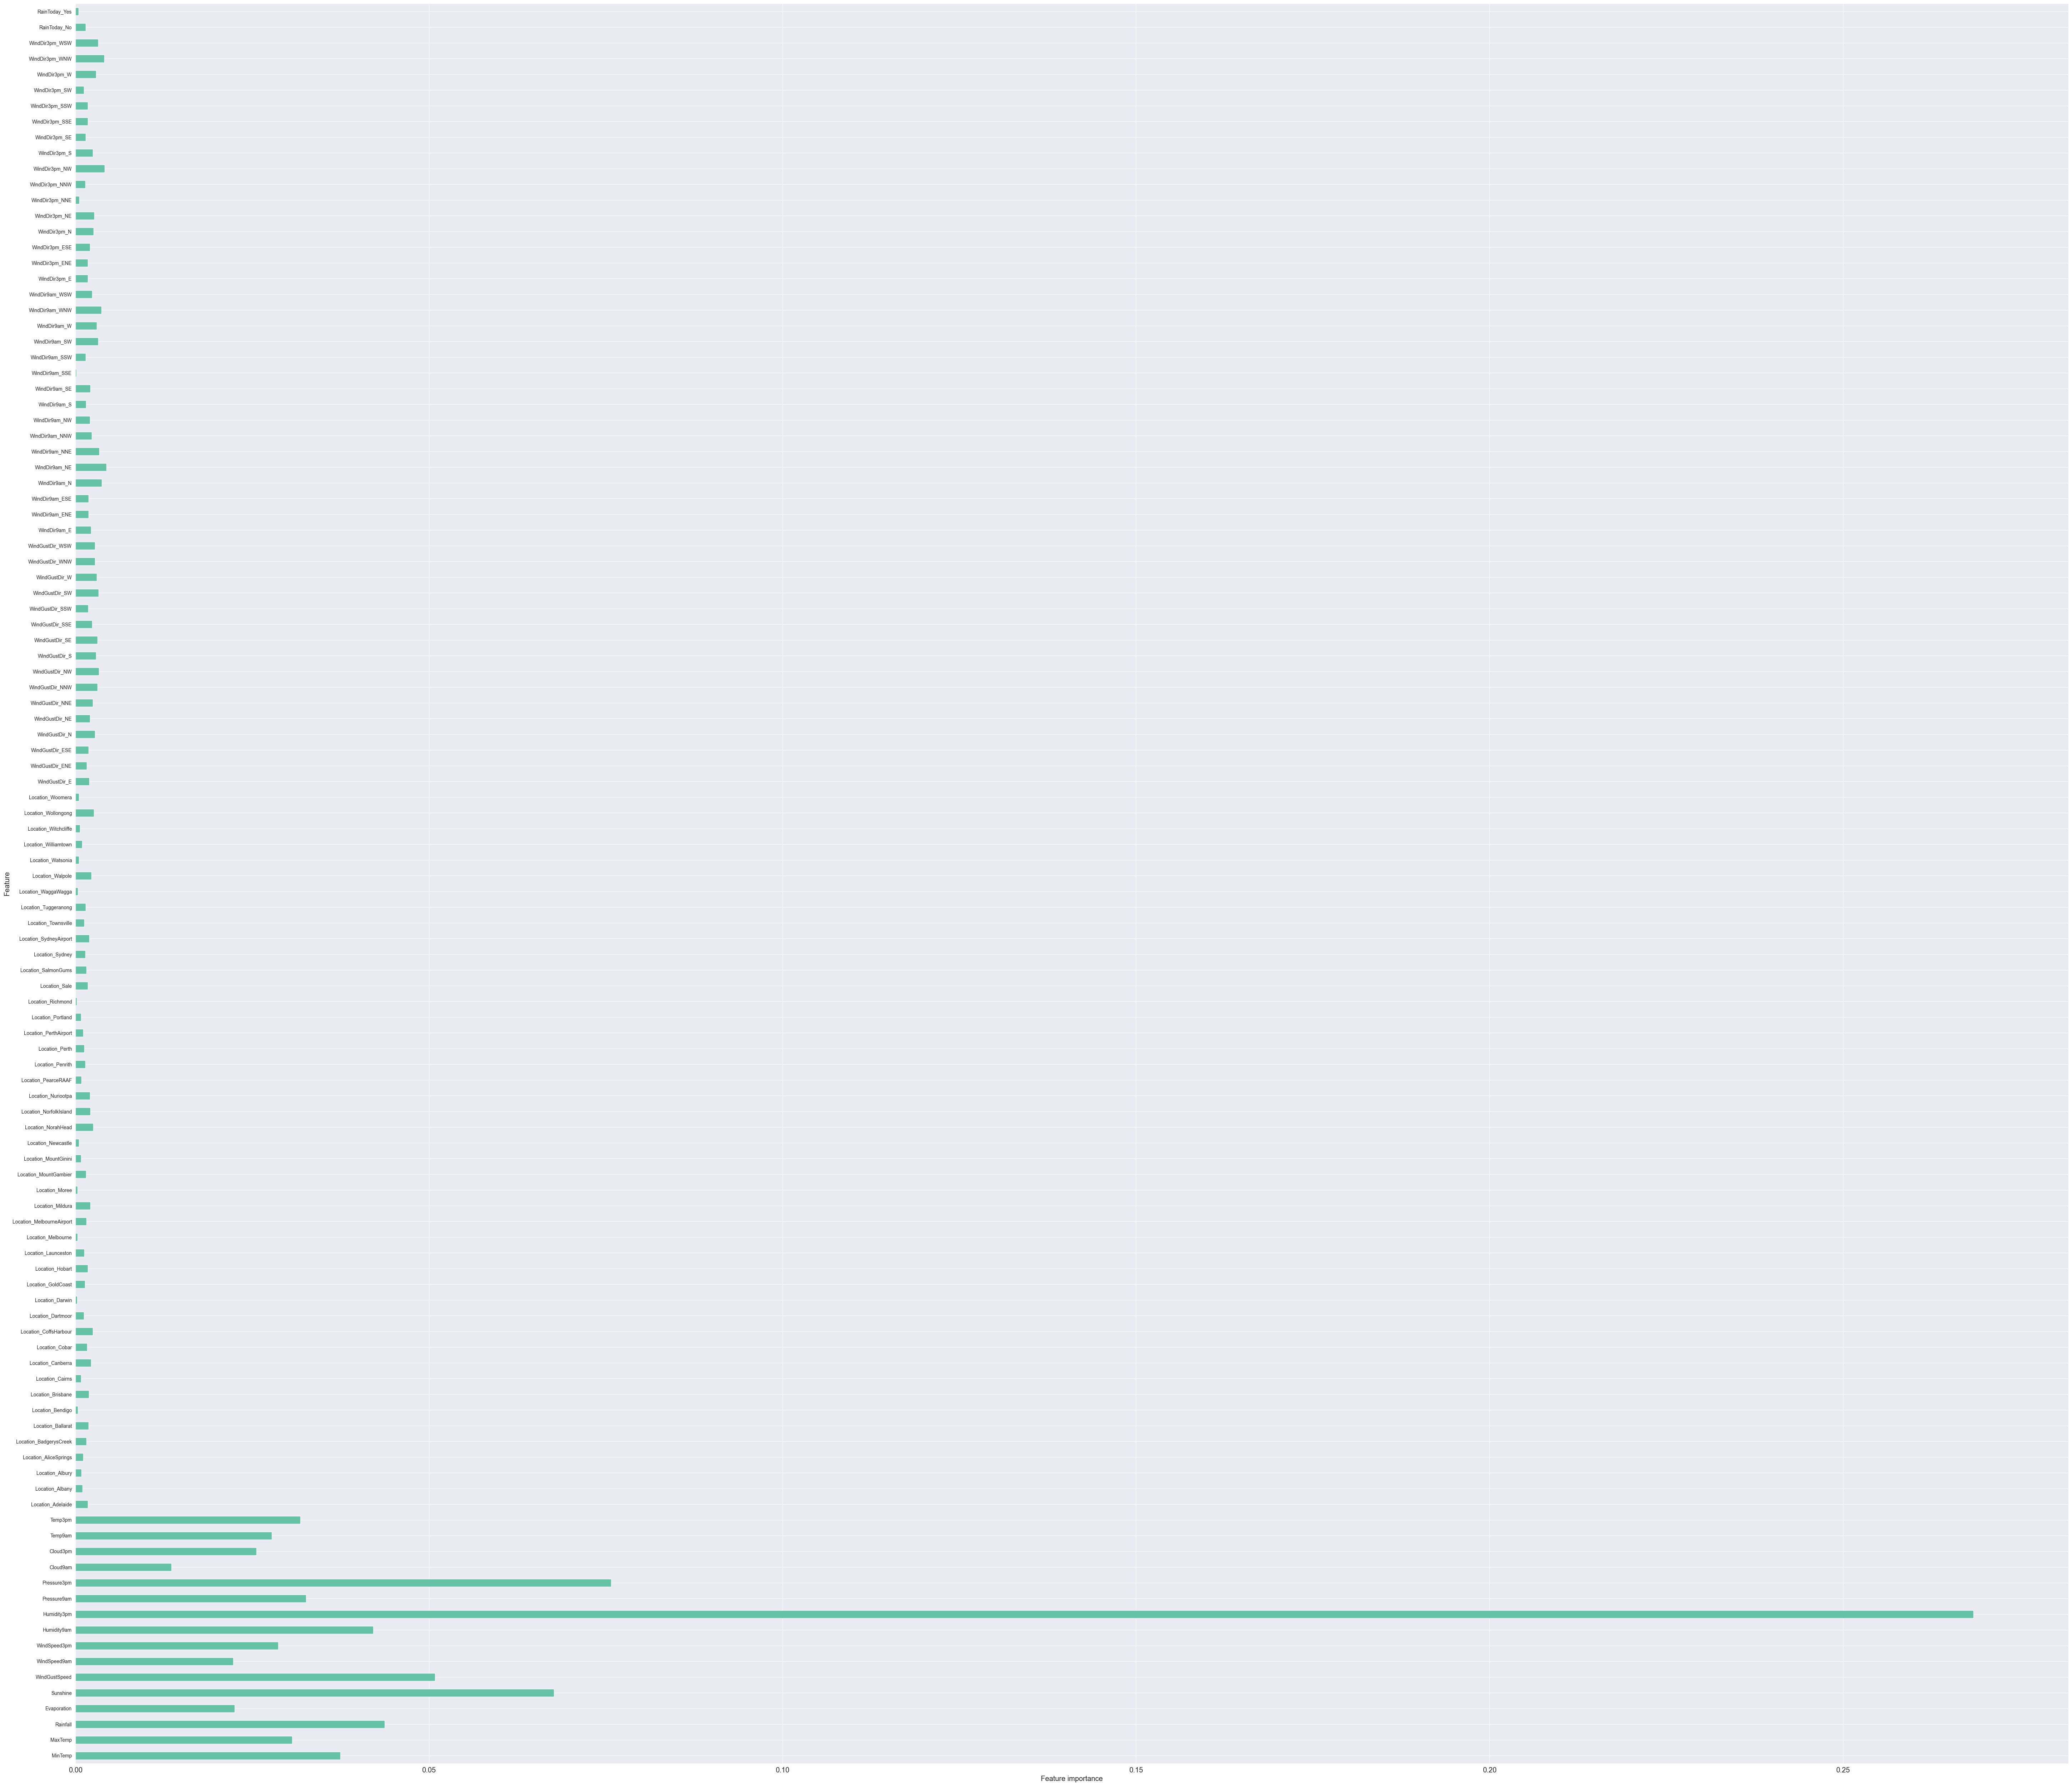

In [ ]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(72, 64))  # Increase the figure size
    bar_width = 0.5  # Adjust the width of the bars
    plt.barh(np.arange(n_features), model.feature_importances_, height=bar_width, align='center')  # Adjust the height
    plt.yticks(np.arange(n_features), X.columns, fontsize=10)  # Adjust fontsize
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features - 0.5)  # Adjust ylim for better spacing

plot_feature_importances_(clf_dt)


In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6995858553679516

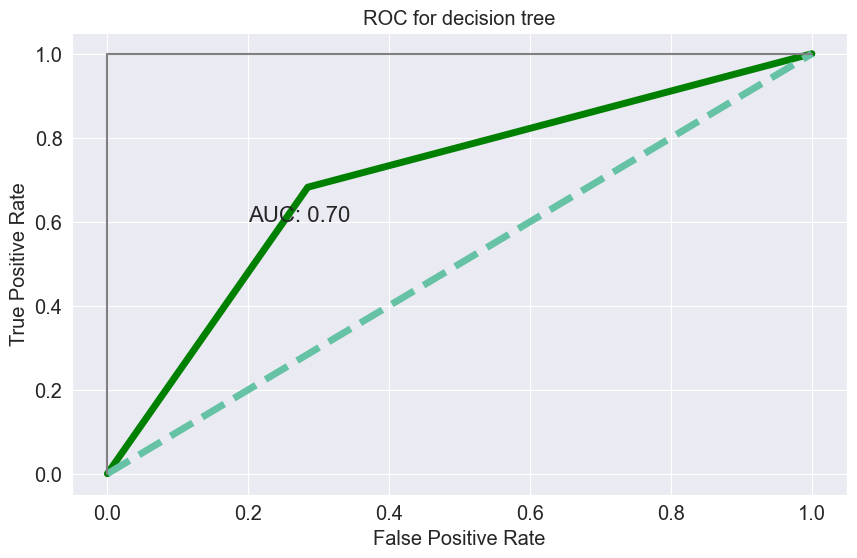

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6988885906695296

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1635
           1       0.69      0.68      0.69      1504

    accuracy                           0.70      3139
   macro avg       0.70      0.70      0.70      3139
weighted avg       0.70      0.70      0.70      3139



[[1170  465]
 [ 478 1026]]


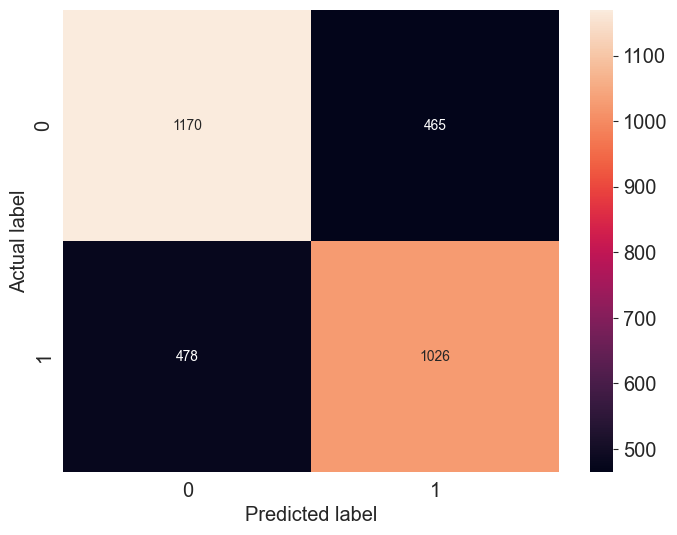

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

In [ ]:
from tqdm import tqdm
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 
print(ccp_alphas)
clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in tqdm(ccp_alphas, desc="Progress"):
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

[0.00000000e+00 5.18004543e-05 5.30127624e-05 6.82655987e-05
 6.82655987e-05 6.96877987e-05 6.96877987e-05 7.16788786e-05
 7.16788786e-05 7.39543986e-05 7.39543986e-05 7.41770459e-05
 7.43336519e-05 7.44490768e-05 7.46654986e-05 7.46654986e-05
 7.46654986e-05 7.46654986e-05 7.46654986e-05 7.49583044e-05
 7.52185763e-05 7.52185763e-05 7.52185763e-05 7.52185763e-05
 7.54514512e-05 7.58506652e-05 7.58506652e-05 7.59099235e-05
 7.61804507e-05 7.62541262e-05 7.63247319e-05 7.64574705e-05
 7.64574705e-05 7.64574705e-05 7.64574705e-05 7.64574705e-05
 7.65799985e-05 7.65799985e-05 7.65799985e-05 7.67987985e-05
 7.67987985e-05 7.67987985e-05 7.68968813e-05 7.69203541e-05
 7.69434290e-05 7.69884252e-05 7.69884252e-05 7.70319461e-05
 7.70740630e-05 7.71543485e-05 7.71543485e-05 7.71543485e-05
 7.73007515e-05 7.73007515e-05 7.73007515e-05 7.73676785e-05
 7.73676785e-05 7.74308874e-05 7.75193798e-05 7.75473248e-05
 7.75473248e-05 7.77006814e-05 7.78123203e-05 7.78733496e-05
 7.79486623e-05 7.798396

Progress:   0%|          | 0/916 [00:00<?, ?it/s]

Progress: 100%|██████████| 916/916 [03:47<00:00,  4.03it/s]


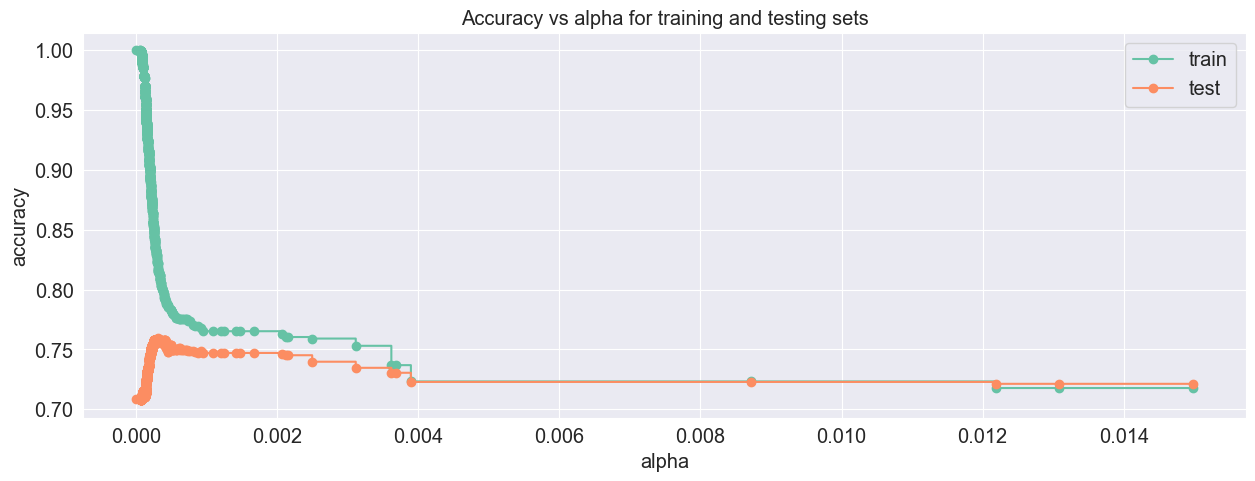

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

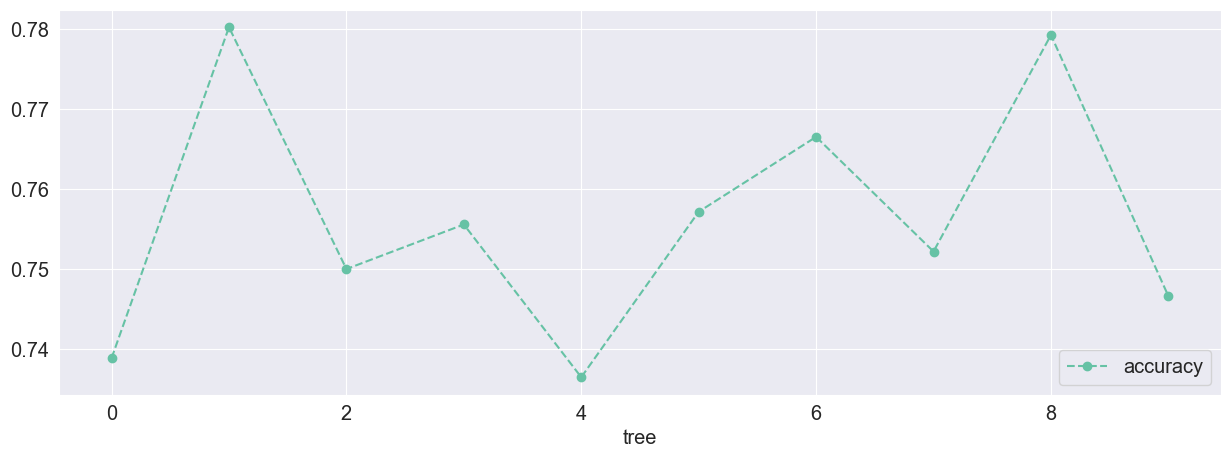

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Cross-validation Progress: 100%|██████████| 916/916 [56:35<00:00,  3.71s/it]    


<Axes: xlabel='alpha'>

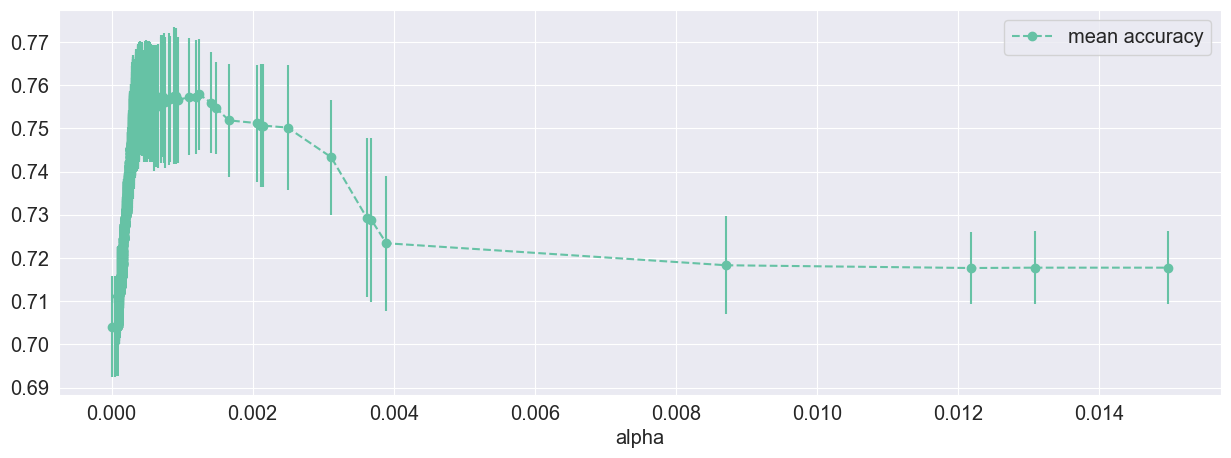

In [ ]:
from tqdm import tqdm

# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

# Use tqdm to create a progress bar
for ccp_alpha in tqdm(ccp_alphas, desc='Cross-validation Progress'):
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)


In [ ]:
alpha_results['mean accuracy'].max()


0.9744708994708995

In [ ]:
alpha_results['mean accuracy'].idxmax()

0

In [ ]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.6481481481481481, 0.9166666666666666, 'Humidity3pm <= 60.5\ngini = 0.499\nsamples = 12556\nvalue = [6501, 6055]\nclass = RainTomorrow No'),
 Text(0.42592592592592593, 0.75, 'Sunshine <= 9.35\ngini = 0.406\nsamples = 6831\nvalue = [4894, 1937]\nclass = RainTomorrow No'),
 Text(0.2962962962962963, 0.5833333333333334, 'Pressure3pm <= 1013.65\ngini = 0.458\nsamples = 4768\nvalue = [3072, 1696]\nclass = RainTomorrow No'),
 Text(0.14814814814814814, 0.4166666666666667, 'Humidity3pm <= 48.5\ngini = 0.499\nsamples = 1787\nvalue = [859.0, 928.0]\nclass = RainTomorrow Yes'),
 Text(0.07407407407407407, 0.25, 'Sunshine <= 5.85\ngini = 0.484\nsamples = 967\nvalue = [569, 398]\nclass = RainTomorrow No'),
 Text(0.037037037037037035, 0.08333333333333333, 'gini = 0.428\nsamples = 200\nvalue = [62, 138]\nclass = RainTomorrow Yes'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.448\nsamples = 767\nvalue = [507, 260]\nclass = RainTomorrow No'),
 Text(0.2222222222222222, 0.25, 'WindGustS

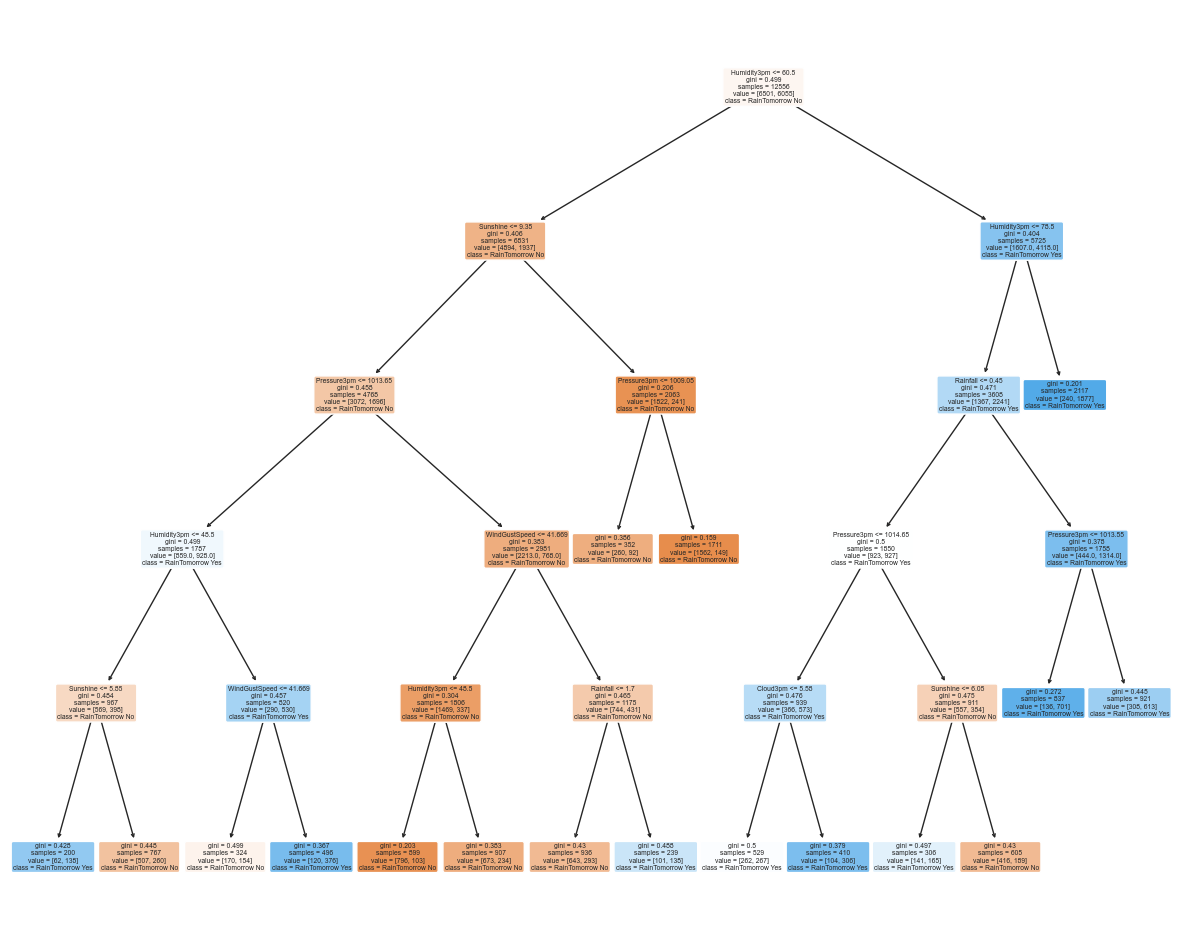

In [ ]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["RainTomorrow No", "RainTomorrow Yes"], 
          feature_names=X.columns)

In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

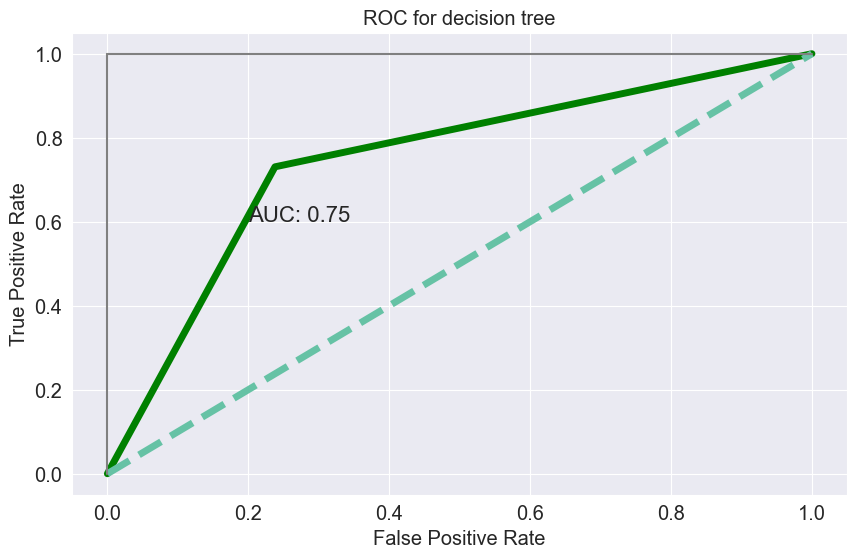

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7463987979048734

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1635
           1       0.74      0.73      0.73      1504

    accuracy                           0.75      3139
   macro avg       0.75      0.75      0.75      3139
weighted avg       0.75      0.75      0.75      3139



[[1246  389]
 [ 405 1099]]


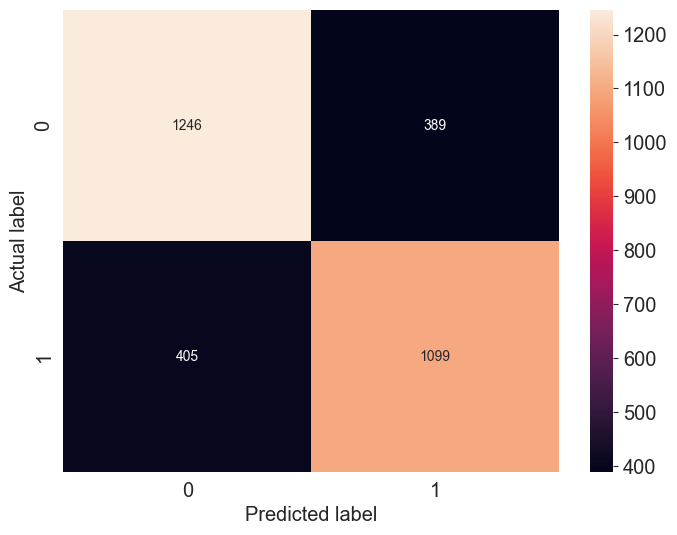

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=1000) 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7849633641287034

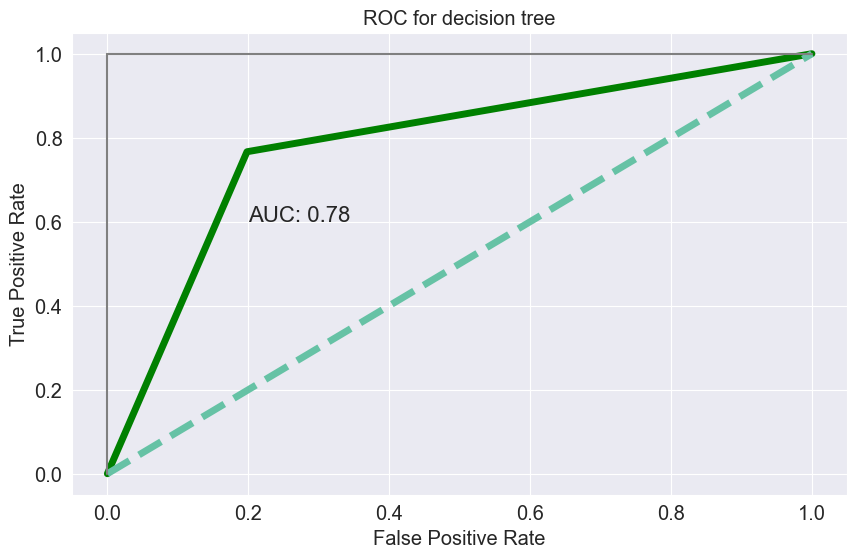

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7842286014054265

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1635
           1       0.78      0.77      0.77      1504

    accuracy                           0.78      3139
   macro avg       0.78      0.78      0.78      3139
weighted avg       0.78      0.78      0.78      3139



[[1311  324]
 [ 351 1153]]


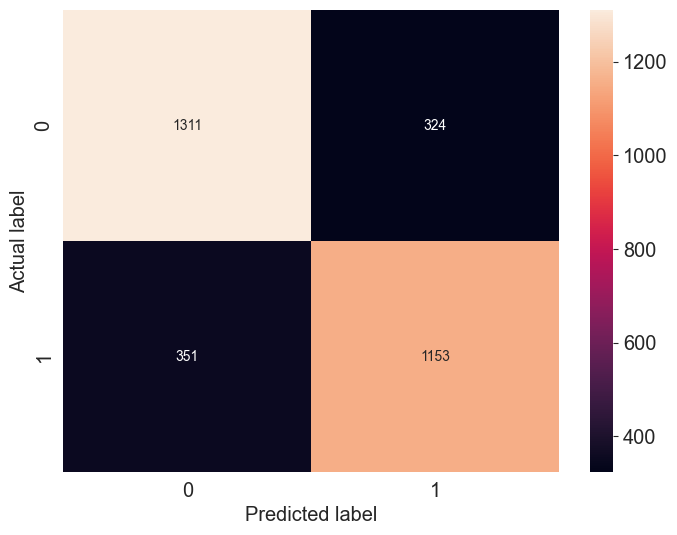

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

# Question 2: Multi-Class Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q2.1.** Build a classification model using Decision Trees to predict the target variable `species` from the dataset.

> **Q2.2.** Evaluate and discuss the model performance.

> **Q2.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q2.4.** Evaluate and discuss the model performance after the pruning.

> **Q2.5.** Build a classification model using Random Forests to predict the target variable `species` from the dataset.

> **Q2.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q2.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q2.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [971]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [972]:
penguin_df = pd.read_csv('penguins.csv')
print(penguin_df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [973]:
#Find the NA values
print("Total Rows =>",penguin_df.shape[0])
print("NA count across rows\n",penguin_df.isna().sum())



Total Rows => 344
NA count across rows
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [974]:
# Dropping the rows with NA values in those rows
# penguin_df.dropna(inplace=True)
penguin_df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

In [975]:
# # Assuming penguin_df is your DataFrame containing the penguin data

# Importing pandas library
import pandas as pd

# Calculate mode of 'sex' column
mode_sex = penguin_df['sex'].mode()[0]

# Fill NaN values in 'sex' column with the mode
penguin_df['sex'] = penguin_df['sex'].fillna(mode_sex)
print(penguin_df.isna().sum())



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


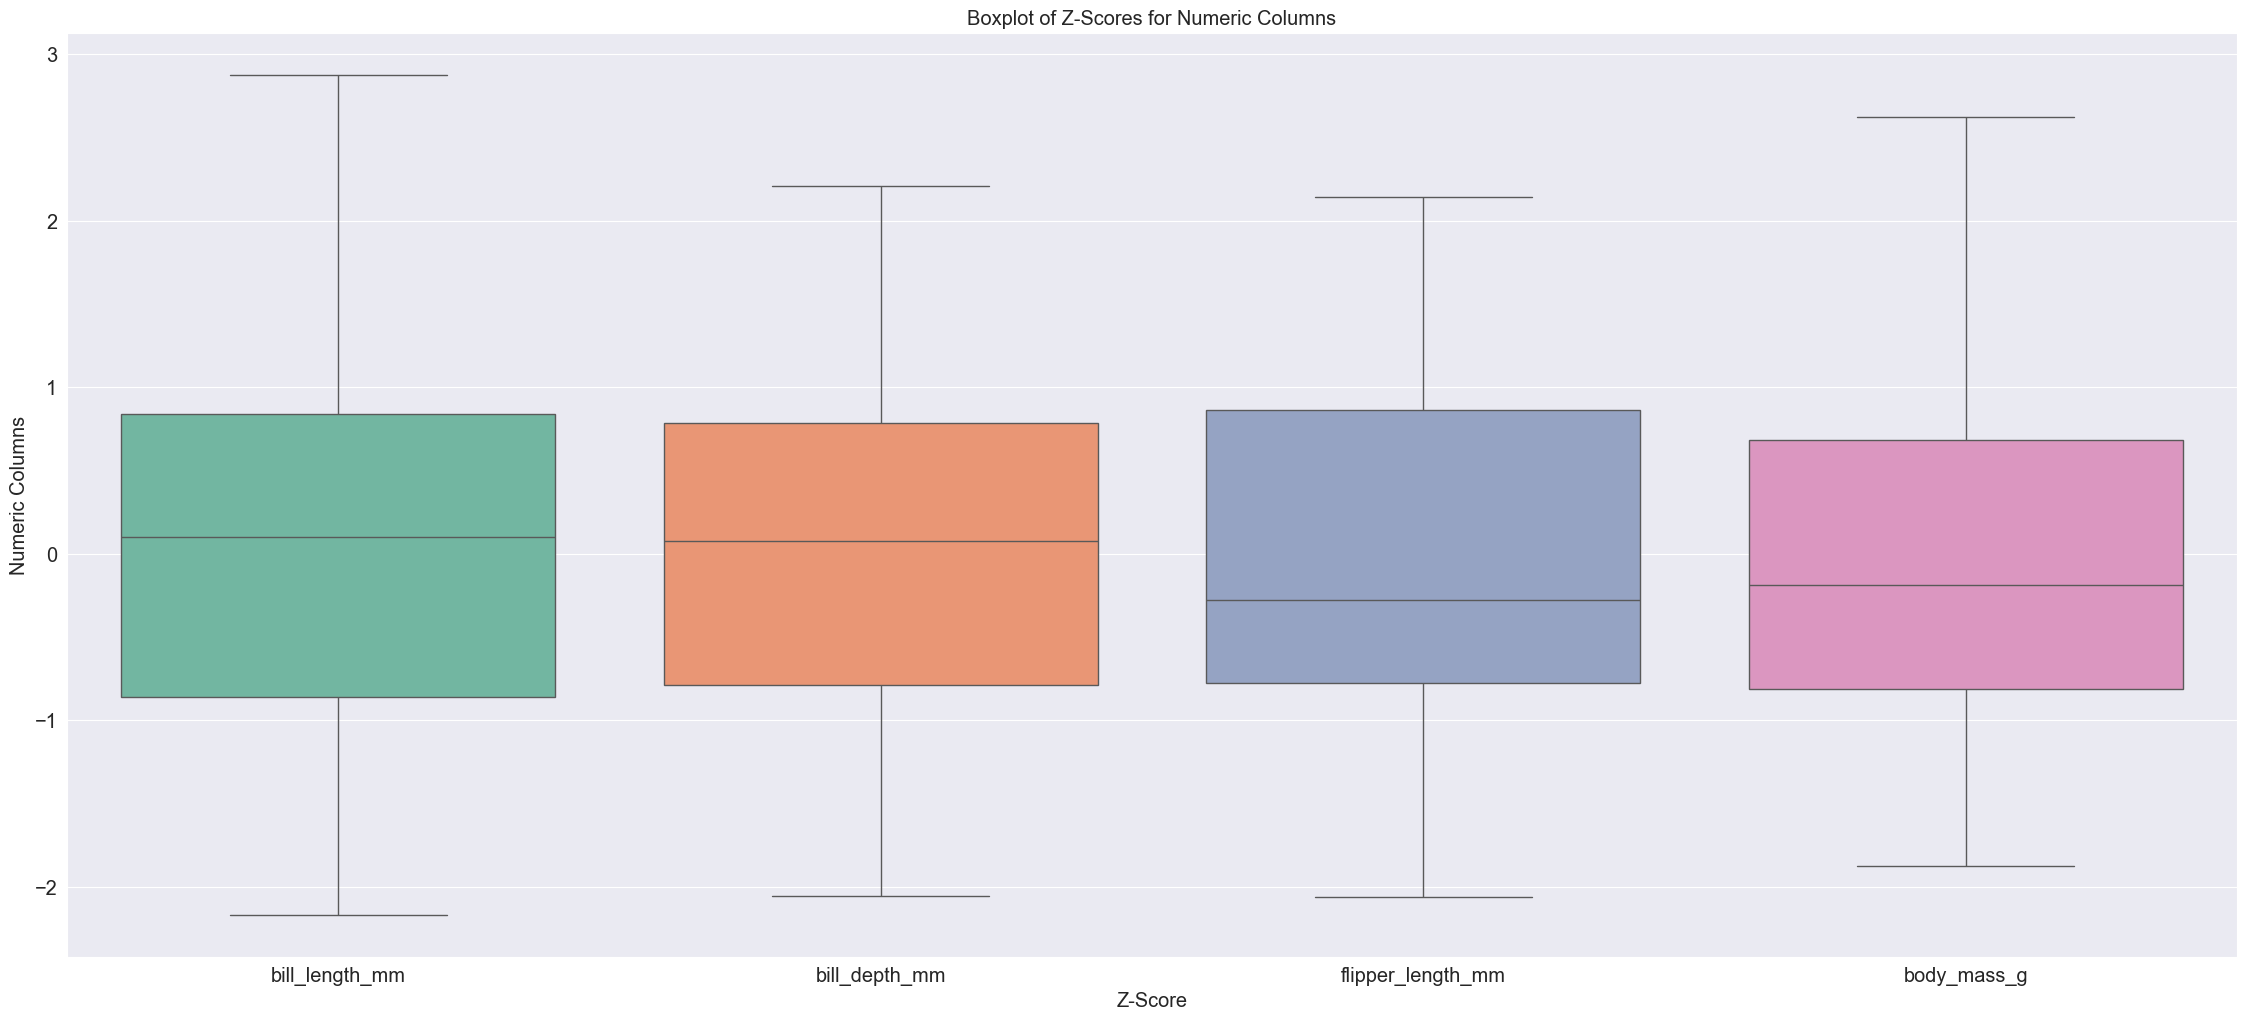

Total outlier rows => 0


In [976]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import zscore


# Calculate z-scores for each numeric column
z_scores = zscore(penguin_df.select_dtypes(include=np.number))

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=penguin_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 12))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
outlier_rows = penguin_df[(abs_z_scores > threshold).any(axis=1)]
print("Total outlier rows =>", outlier_rows.shape[0])
penguin_df = penguin_df[(abs_z_scores <= threshold).all(axis=1)]





In [977]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

penguin_df['species'] = label_encoder.fit_transform(penguin_df.species)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

penguin_df['species'] = label_encoder.fit_transform(penguin_df.species)

In [978]:

penguin_df = pd.get_dummies(penguin_df)
penguin_df = penguin_df.replace({True:1, False:0})
print(penguin_df.head(20))

    species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         0            39.1           18.7              181.0       3750.0   
1         0            39.5           17.4              186.0       3800.0   
2         0            40.3           18.0              195.0       3250.0   
4         0            36.7           19.3              193.0       3450.0   
5         0            39.3           20.6              190.0       3650.0   
6         0            38.9           17.8              181.0       3625.0   
7         0            39.2           19.6              195.0       4675.0   
8         0            34.1           18.1              193.0       3475.0   
9         0            42.0           20.2              190.0       4250.0   
10        0            37.8           17.1              186.0       3300.0   
11        0            37.8           17.3              180.0       3700.0   
12        0            41.1           17.6              182.0   

/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_17996/2175311353.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguin_df = penguin_df.replace({True:1, False:0})


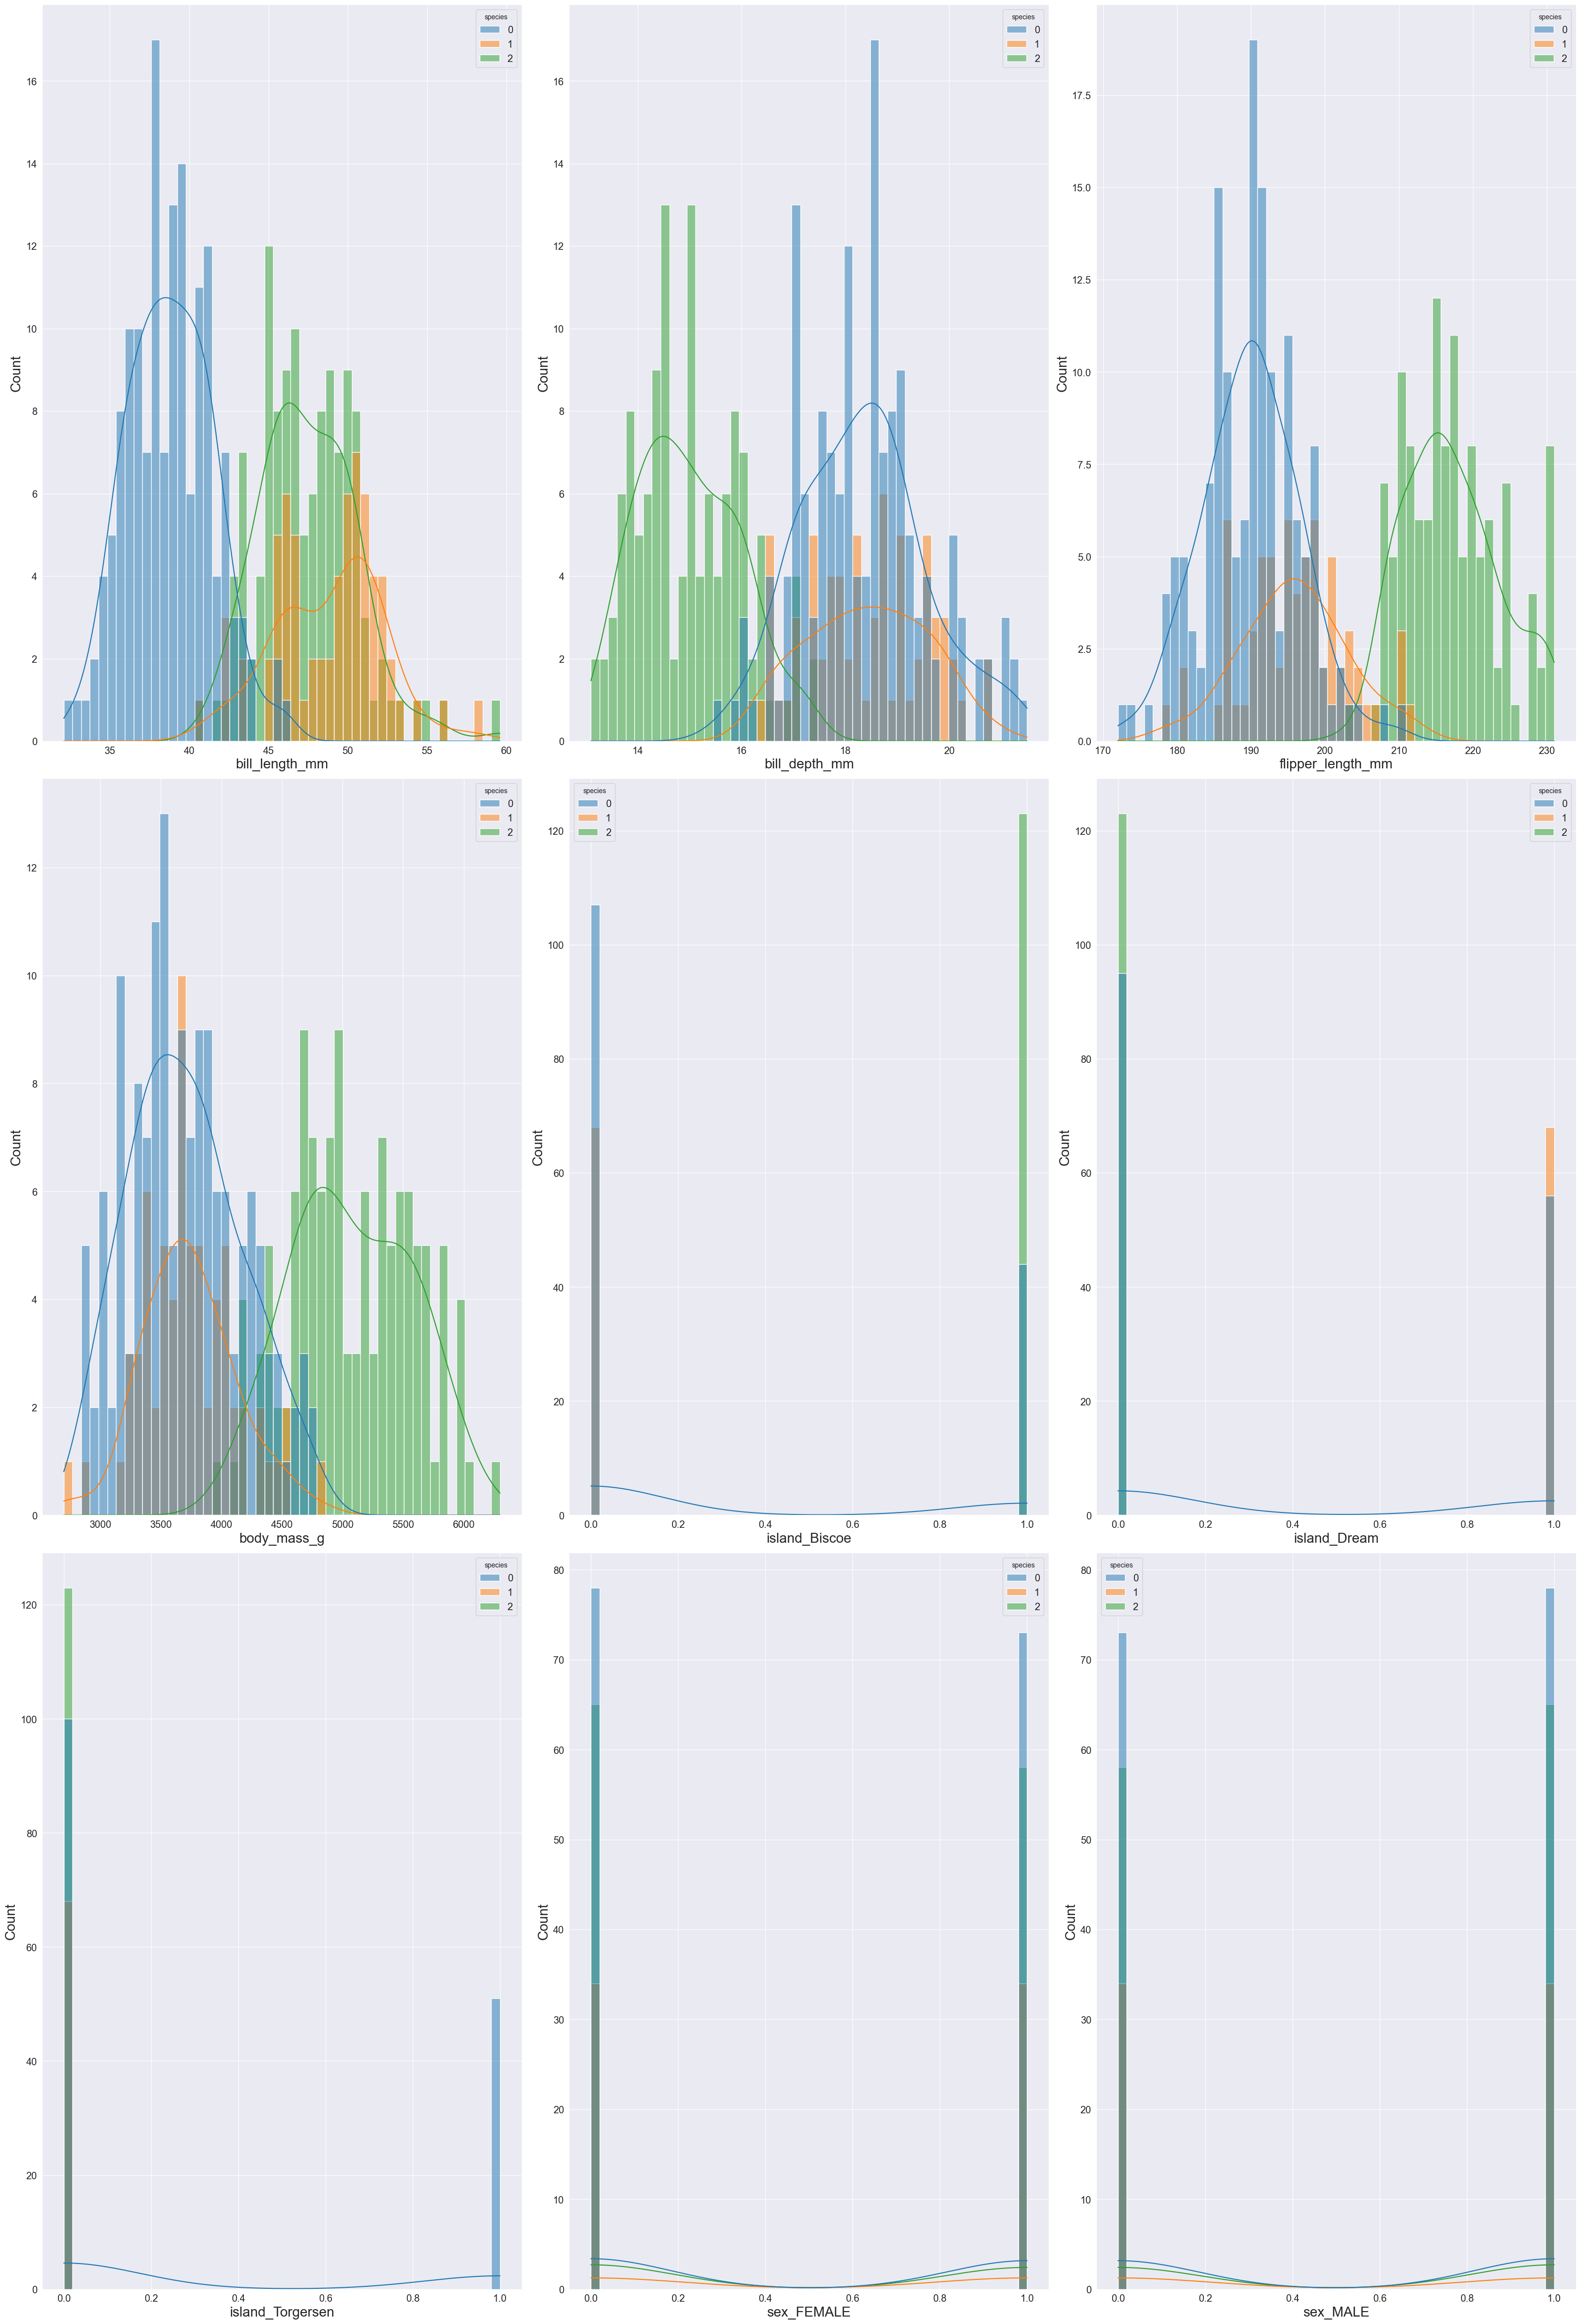

In [979]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(penguin_df.shape[1] / num_cols) + 1
palette = sns.color_palette('tab10', n_colors=len(penguin_df['species'].unique()))
for index, col in enumerate(penguin_df.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(penguin_df, x=col, hue='species', kde=True, bins=50, palette=palette)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

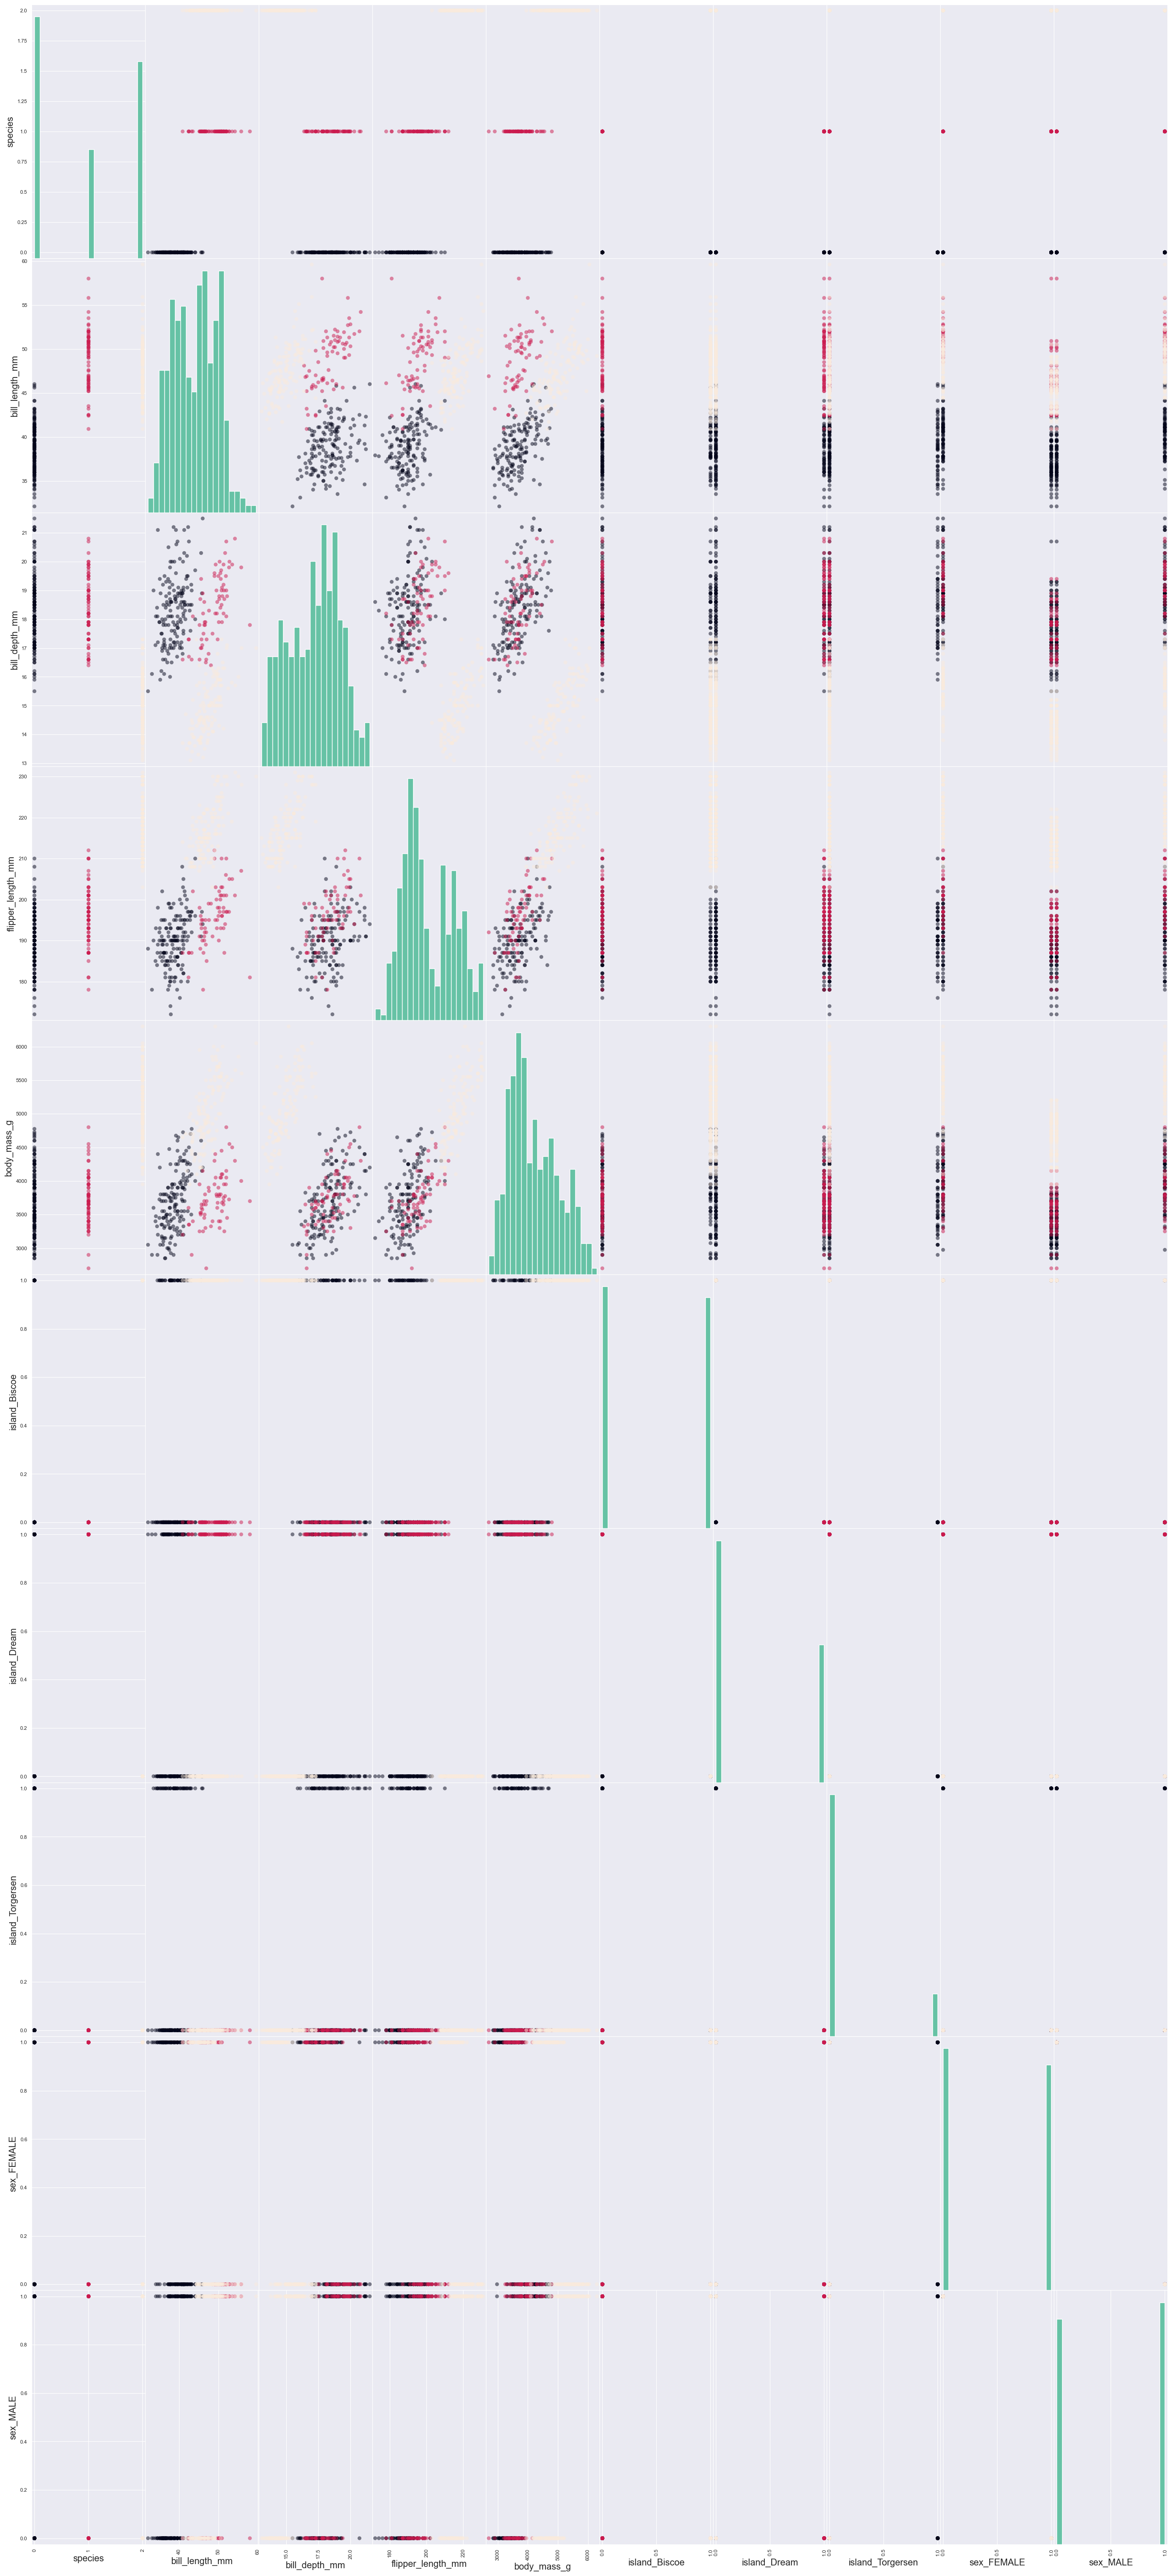

In [980]:
from pandas.plotting import scatter_matrix

# List of attributes for scatter matrix
attributes = penguin_df.columns.tolist()

# Add hue to the scatter matrix plot
scatter_matrix(penguin_df[attributes], figsize=(32, 72), c=penguin_df['species'], marker='o', hist_kwds={'bins': 20}, alpha=0.5)
plt.show()

species              1.000000
bill_length_mm       0.731369
bill_depth_mm       -0.744076
flipper_length_mm    0.854307
body_mass_g          0.750491
island_Biscoe        0.608185
island_Dream        -0.312855
island_Torgersen    -0.431225
sex_FEMALE          -0.009790
sex_MALE             0.009790
Name: species, dtype: float64


<Axes: >

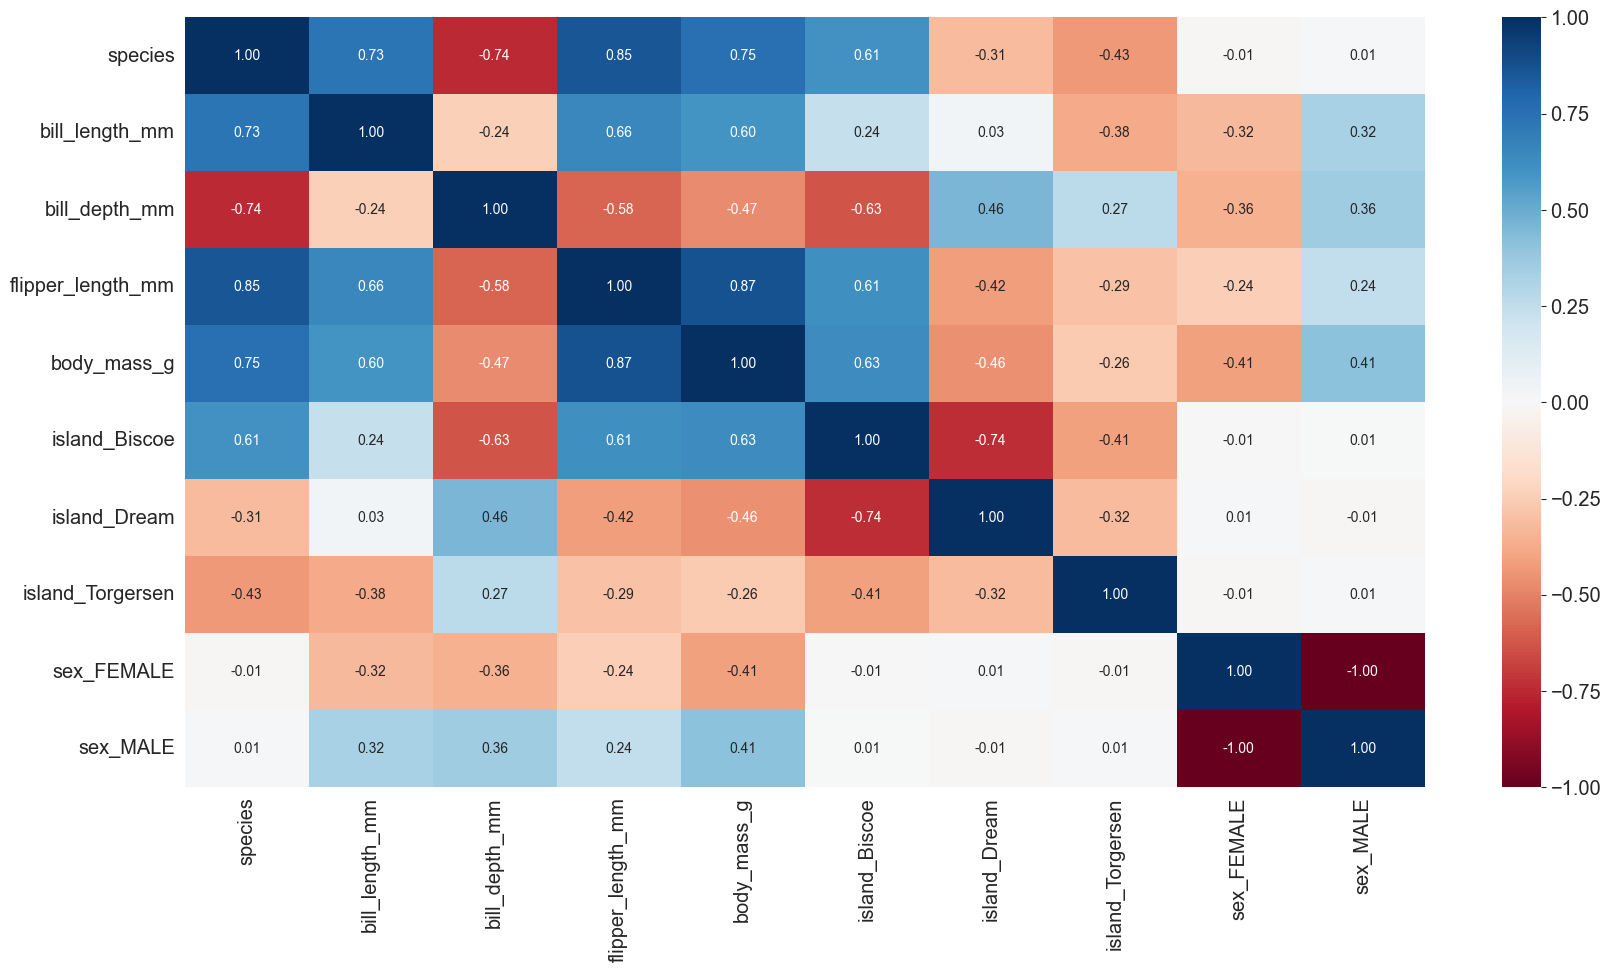

In [981]:
penguin_df_corr_matrix = penguin_df.corr()
print(penguin_df_corr_matrix['species'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(penguin_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f")

In [982]:
y = penguin_df.species.values
X = penguin_df.drop(['species'], axis=1)


In [983]:
# Normalizing the independent variables: Makes the convergence faster
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [984]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [985]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [986]:
clf_dt_penguin = DecisionTreeClassifier(random_state=42)
clf_dt_penguin = clf_dt_penguin.fit(X_train, y_train)

[Text(0.6710526315789473, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.641\nsamples = 273\nvalue = [116, 56, 101]\nclass = Adelie'),
 Text(0.4473684210526316, 0.75, 'bill_length_mm <= 43.35\ngini = 0.434\nsamples = 166\nvalue = [114, 51, 1]\nclass = Adelie'),
 Text(0.2631578947368421, 0.5833333333333334, 'bill_length_mm <= 42.35\ngini = 0.05\nsamples = 116\nvalue = [113, 3, 0]\nclass = Adelie'),
 Text(0.15789473684210525, 0.4166666666666667, 'bill_depth_mm <= 16.65\ngini = 0.018\nsamples = 109\nvalue = [108, 1, 0]\nclass = Adelie'),
 Text(0.10526315789473684, 0.25, 'bill_length_mm <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = Adelie'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = Adelie'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = Adelie'),
 

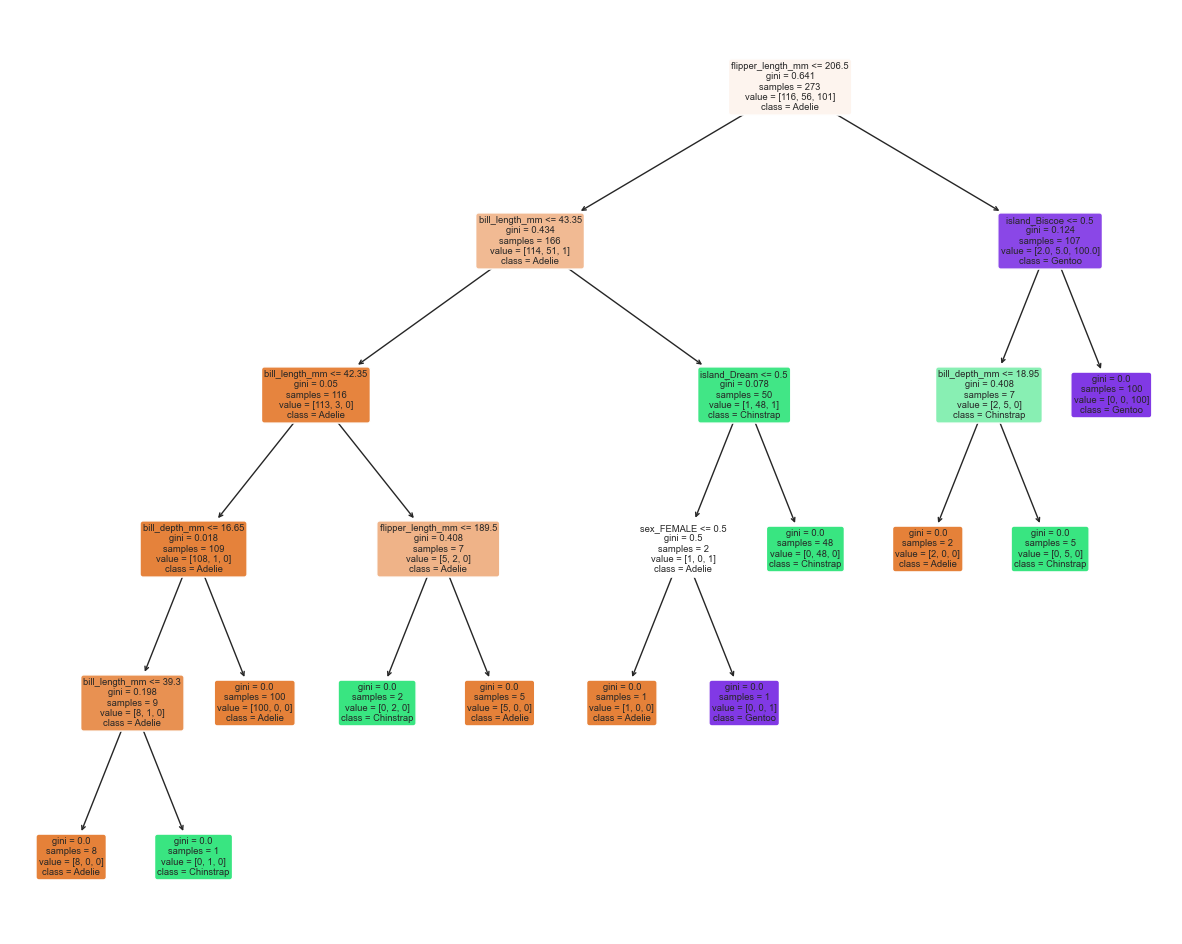

In [987]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt_penguin,
          filled=True,
          rounded=True,
          class_names=['Adelie','Chinstrap','Gentoo'],
          feature_names=X.columns)

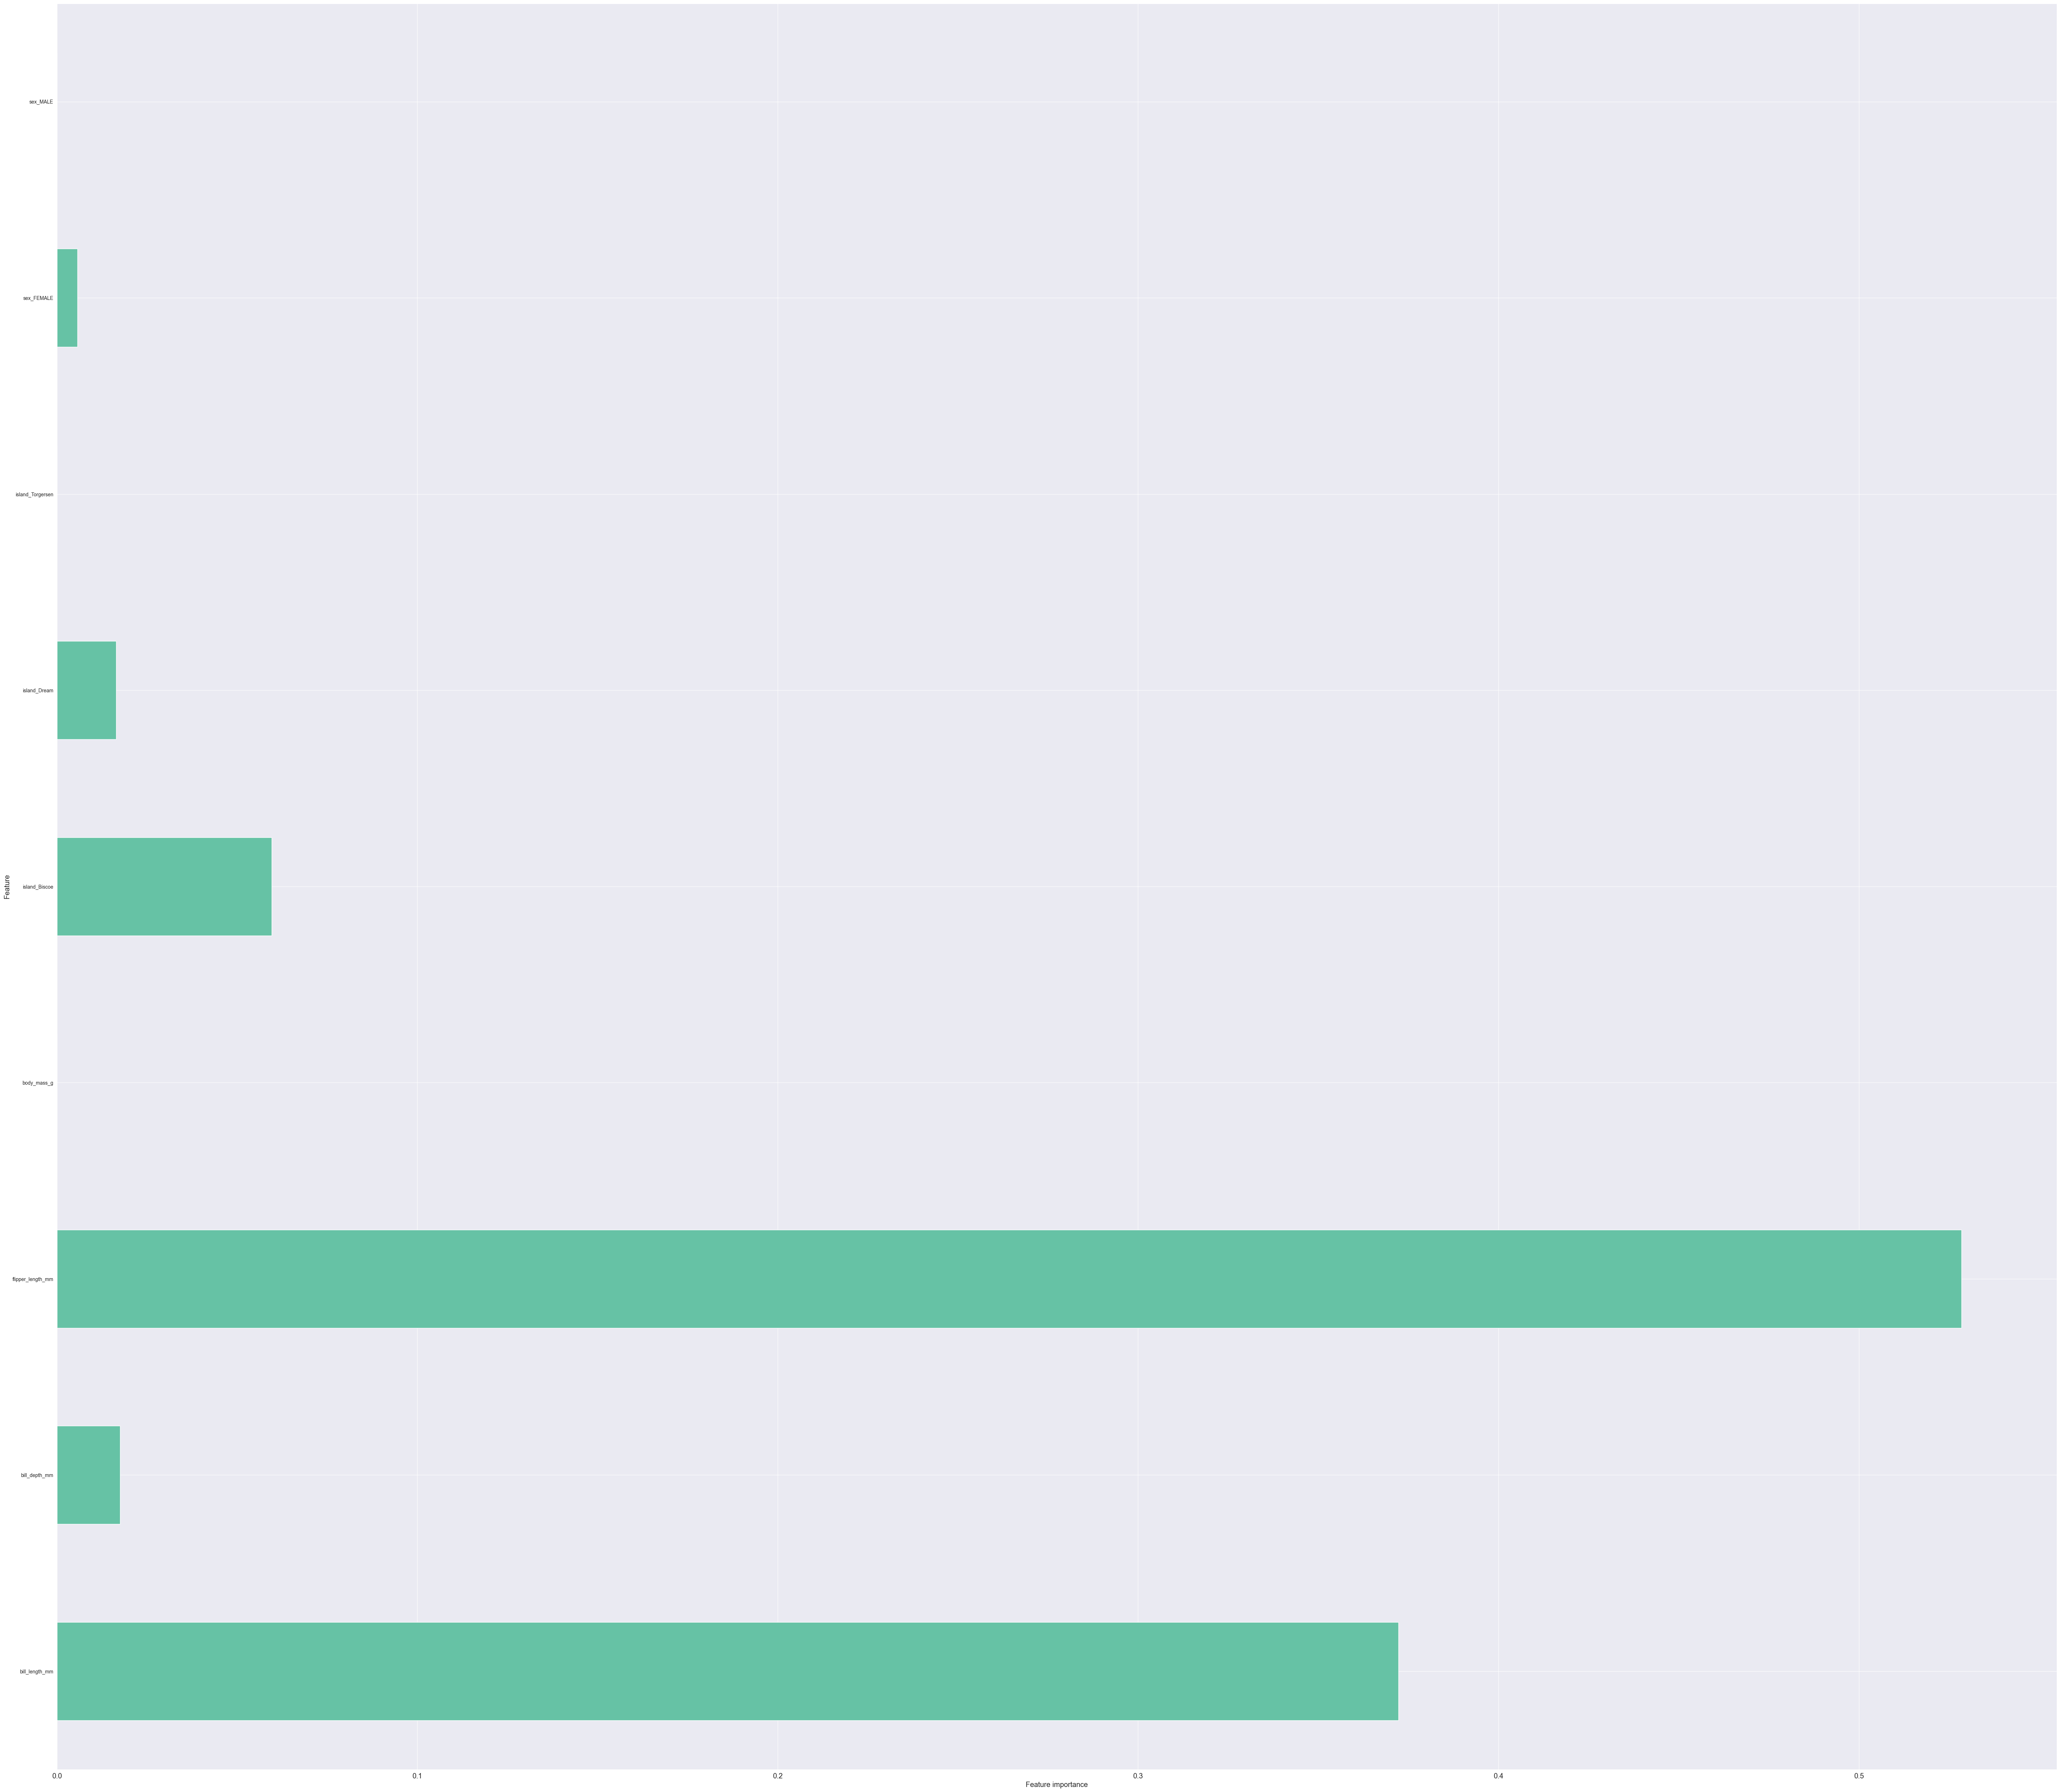

In [988]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(72, 64))  # Increase the figure size
    bar_width = 0.5  # Adjust the width of the bars
    plt.barh(np.arange(n_features), model.feature_importances_, height=bar_width, align='center')  # Adjust the height
    plt.yticks(np.arange(n_features), X.columns, fontsize=10)  # Adjust fontsize
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features - 0.5)  # Adjust ylim for better spacing

plot_feature_importances_(clf_dt_penguin)


In [989]:
y_pred = clf_dt_penguin.predict(X_test)

In [990]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

[[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


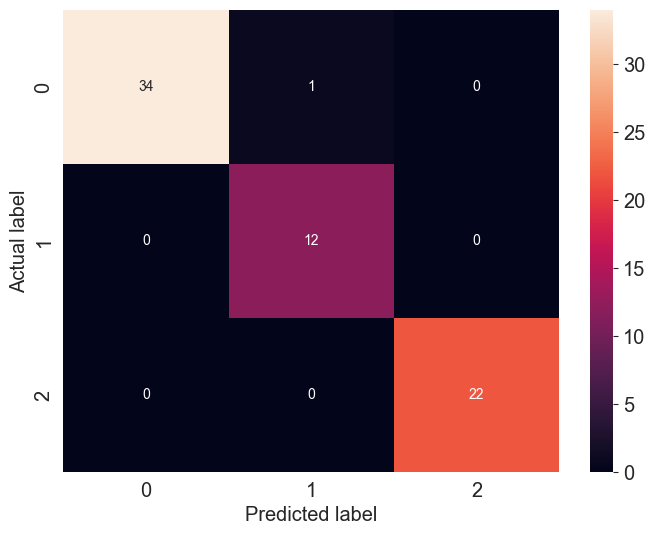

In [991]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');


In [996]:
from tqdm import tqdm
# Extracting the different values of alpha that are available for this tree and
# Build a pruned tree for each value of ccp_alpha
path = clf_dt_penguin.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree
ccp_alphas_penguin = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value
print(ccp_alphas)
clf_dtrees_penguin = [] # Creating an array to store the created decision trees

# For each value for alpha, create a decision tree and store it in the clf_dts array
for ccp_alpha_penguin in tqdm(ccp_alphas_penguin, desc="Progress Bar"):
    clf_dt_penguin = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_penguin)
    clf_dt_penguin.fit(X_train, y_train)
    clf_dtrees_penguin.append(clf_dt_penguin)

[0.         0.0036294  0.003663   0.00707541 0.01046572 0.01054945
 0.0381461  0.22824658]


Progress Bar: 100%|██████████| 8/8 [00:00<00:00, 822.29it/s]


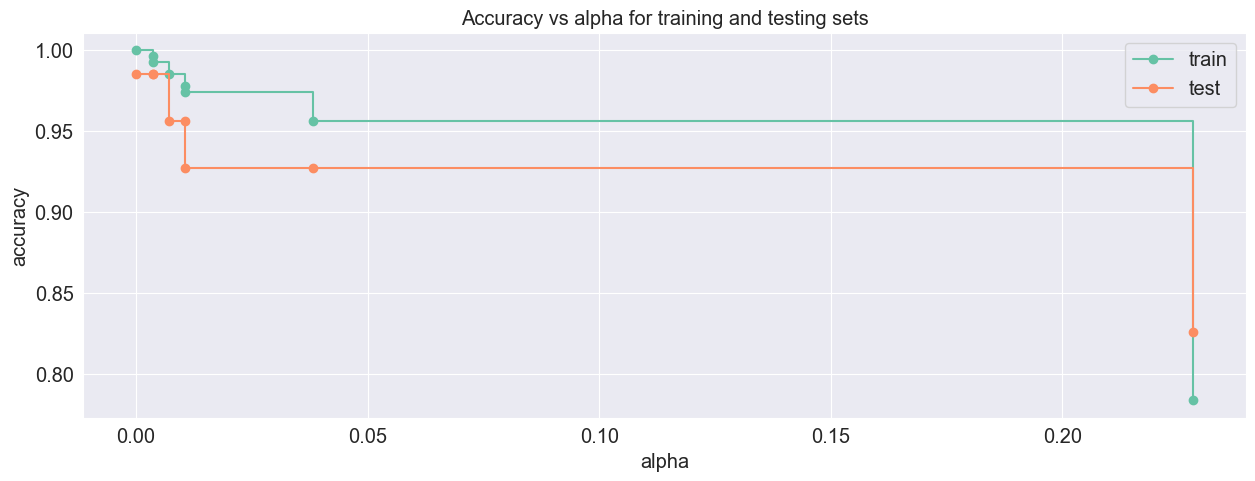

In [ ]:
train_scores = [clf_dt_penguin.score(X_train, y_train) for clf_dt_penguin in clf_dtrees_penguin]
test_scores = [clf_dt_penguin.score(X_test, y_test) for clf_dt_penguin in clf_dtrees_penguin]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

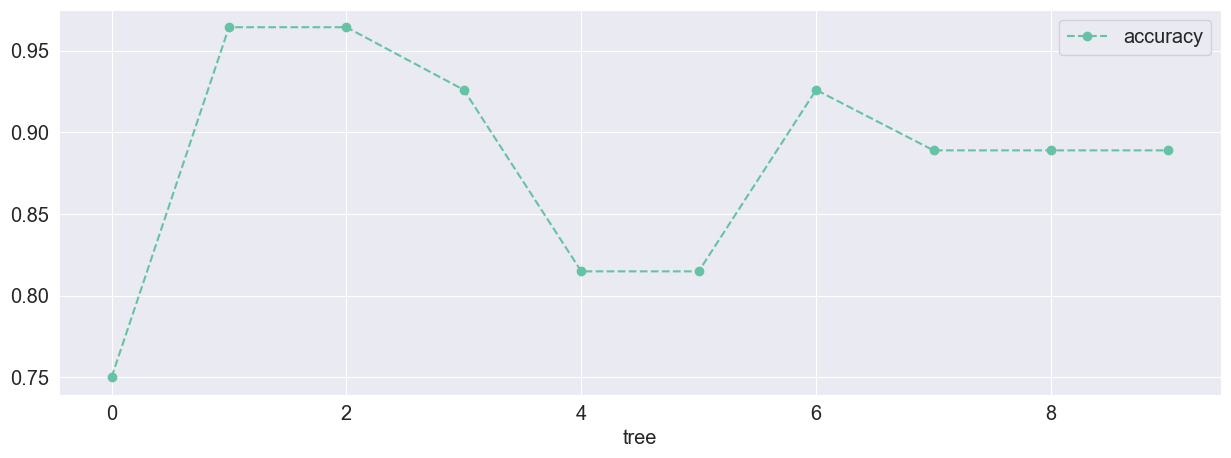

In [997]:
clf_dt_penguin = DecisionTreeClassifier(random_state=42, ccp_alpha=0.008)

scores_p = cross_val_score(clf_dt_penguin, X_train, y_train, cv=10)
df_p = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df_p.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Progress: 100%|██████████| 8/8 [00:00<00:00, 47.24it/s]


<Axes: xlabel='alpha'>

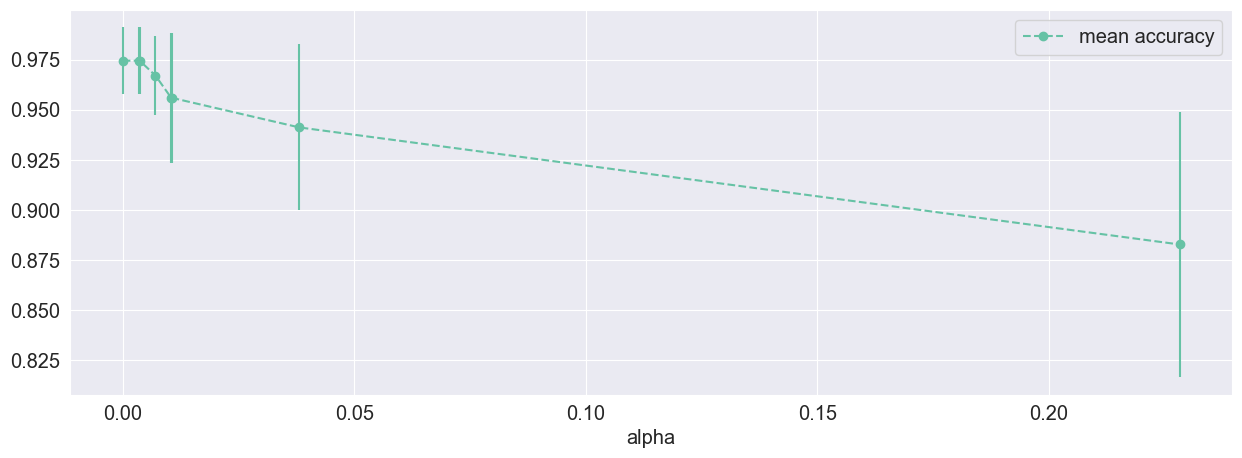

In [999]:
from tqdm import tqdm
# Create a list to store the results of each fold during cross validation
alpha_loop_values_penguin = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy)
# for each call cross_val_score in alpha_loop_values list


for ccp_alpha_penguin in tqdm(ccp_alphas_penguin, desc="Progress"):
    clf_dt_penguin = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_penguin)
    scores = cross_val_score(clf_dt_penguin, X_train, y_train, cv=10)
    alpha_loop_values_penguin.append([ccp_alpha_penguin, np.mean(scores), np.std(scores)])

# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results_penguin = pd.DataFrame(alpha_loop_values_penguin,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results_penguin.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [1000]:
alpha_results_penguin['mean accuracy'].max()

0.9744708994708995

In [1001]:
alpha_results_penguin['mean accuracy'].idxmax()

0

In [1002]:
ideal_ccpa_alpha_penguin = alpha_results_penguin.iloc[alpha_results_penguin['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha_penguin

0.0

In [1003]:
clf_dt_penguin = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha_penguin )
clf_dt_penguin = clf_dt_penguin.fit(X_train, y_train)

[Text(0.6710526315789473, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.641\nsamples = 273\nvalue = [116, 56, 101]\nclass = Adelie'),
 Text(0.4473684210526316, 0.75, 'bill_length_mm <= 43.35\ngini = 0.434\nsamples = 166\nvalue = [114, 51, 1]\nclass = Adelie'),
 Text(0.2631578947368421, 0.5833333333333334, 'bill_length_mm <= 42.35\ngini = 0.05\nsamples = 116\nvalue = [113, 3, 0]\nclass = Adelie'),
 Text(0.15789473684210525, 0.4166666666666667, 'bill_depth_mm <= 16.65\ngini = 0.018\nsamples = 109\nvalue = [108, 1, 0]\nclass = Adelie'),
 Text(0.10526315789473684, 0.25, 'bill_length_mm <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = Adelie'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = Adelie'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = Adelie'),
 

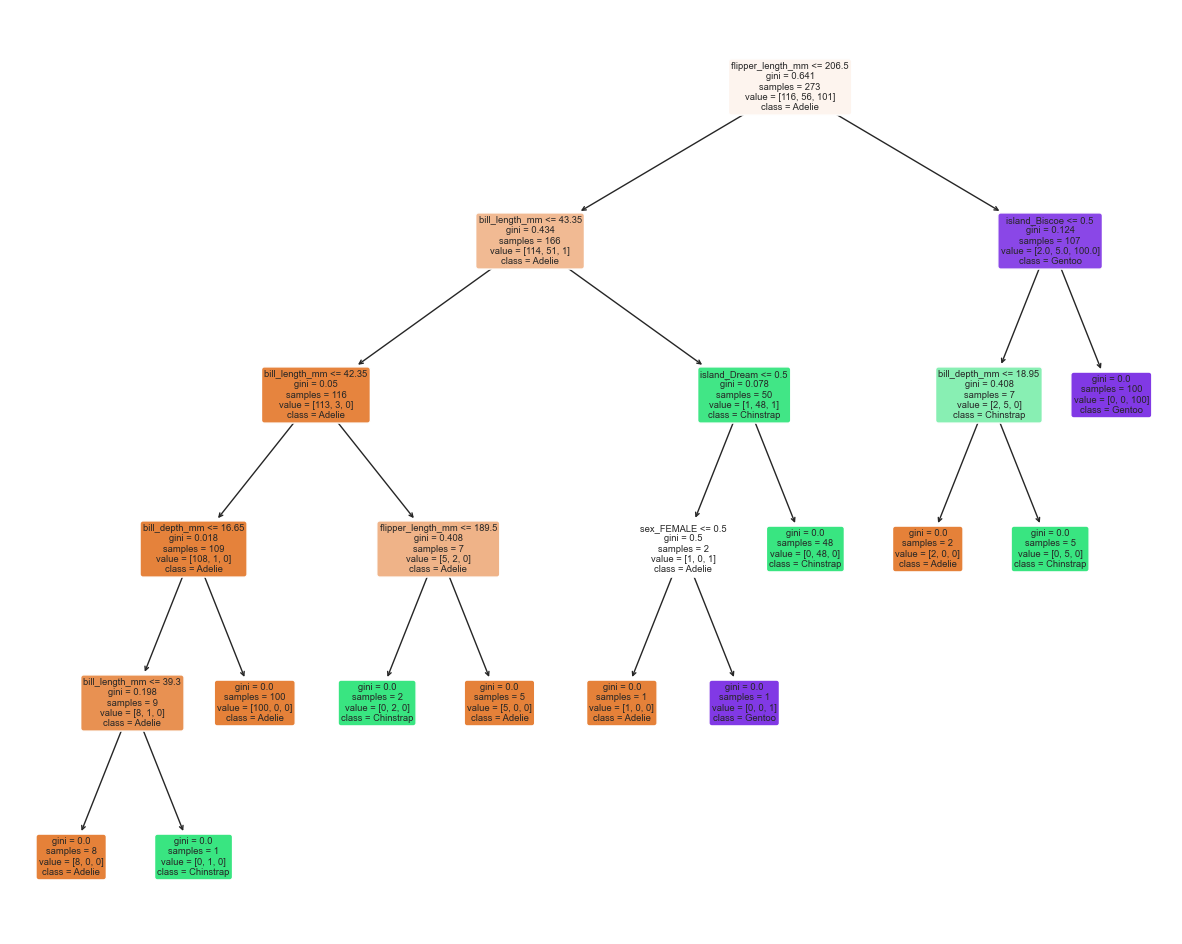

In [ ]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt_penguin,
          filled=True,
          rounded=True,
          class_names=['Adelie','Chinstrap','Gentoo'],
          feature_names=X.columns)

In [1004]:
y_pred = clf_dt_penguin.predict(X_test)

In [1005]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

In [1006]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



[[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


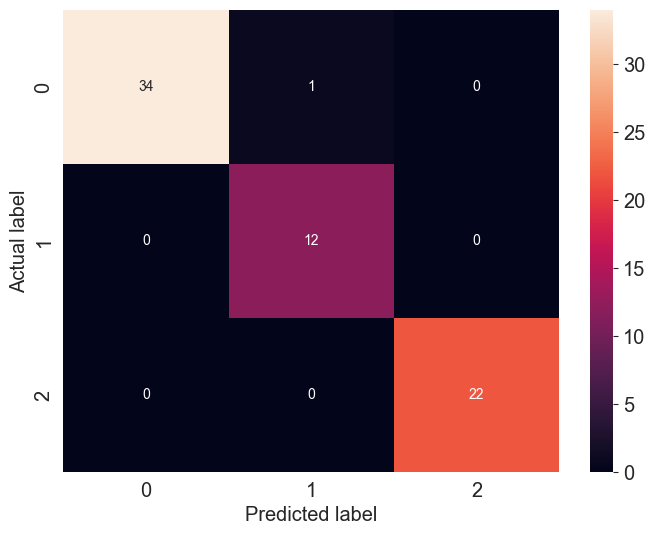

In [1007]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');


In [1008]:
from sklearn.ensemble import RandomForestClassifier
clf_rfPenguin = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rfPenguin.fit(X_train, y_train)

RandomForestClassifier()

In [1009]:
y_pred = clf_rfPenguin.predict(X_test)

In [1010]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9855072463768116

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



[[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


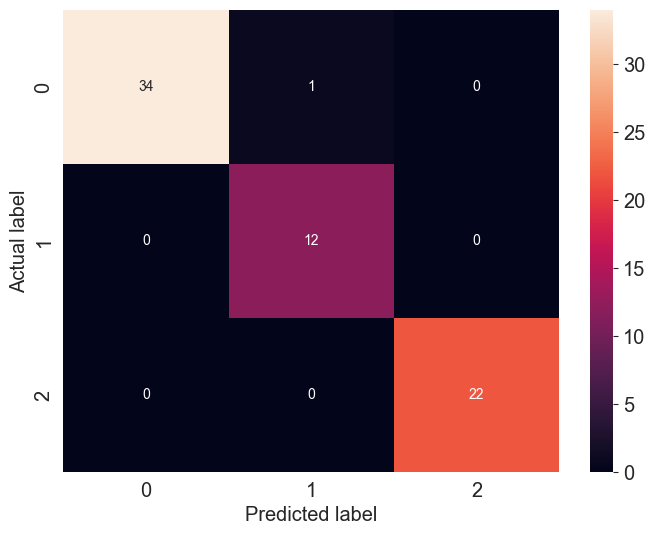

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab3.ipynb** to the **Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection